<a href="https://colab.research.google.com/github/crisb-7/Data-Science-Salaries/blob/main/M1_Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis estadístico de salarios en Ciencia de Datos

Cristofer Becerra Sánchez - A01638659

# Conectar con Google Colab e importar paquetes

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")  
%cd "/content/gdrive/MyDrive/7mo Semestre/Datasets/DataScienceJobs/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/7mo Semestre/Datasets/DataScienceJobs


In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['figure.dpi'] = 100

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
#!pip install matplotlib --upgrade

# Importar el conjunto de datos

In [3]:
colNames = ["ID", "WorkYear", "ExperienceLevel", "EmploymentType", "JobTitle", "Salary", "Currency", "SalaryUSD", "Residence", "RemoteRatio", "CompanyLocation", "CompanySize"]
df = pd.read_csv("ds_salaries.csv", names = colNames, header = 0)

# Preprocesamiento de los datos

Tras importar el Data Frame, se busca hacer una exploración inicial del mismo para entenderlo y limpiarlo para un mejor análisis estadístico.

## Exploración inicial

Primero observamos los primeros 5 elementos del conjunto,

In [4]:
df.head()

,ID,WorkYear,ExperienceLevel,EmploymentType,JobTitle,Salary,Currency,SalaryUSD,Residence,RemoteRatio,CompanyLocation,CompanySize
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Luego exploramos la forma del conjunto, la composición estadística de las variables numéricas, su información básica de Python, y buscamos elementos nulos o NaN.

In [5]:
df.shape

(607, 12)

In [6]:
df.describe()

,ID,WorkYear,Salary,SalaryUSD,RemoteRatio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


De primera instancia se observa el problema de las grandes magnitudes del salario, por lo que se requerirá realizar un escalamiento. En este caso, los estadísticos de ID y Año resultan irrelevantes. También resulta poco práctico manejar dos columnas de salario. Se prosigue con la información relvante de Python del arreglo,

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               607 non-null    int64 
 1   WorkYear         607 non-null    int64 
 2   ExperienceLevel  607 non-null    object
 3   EmploymentType   607 non-null    object
 4   JobTitle         607 non-null    object
 5   Salary           607 non-null    int64 
 6   Currency         607 non-null    object
 7   SalaryUSD        607 non-null    int64 
 8   Residence        607 non-null    object
 9   RemoteRatio      607 non-null    int64 
 10  CompanyLocation  607 non-null    object
 11  CompanySize      607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Y se identifica que no hay elementos nulos (por la forma del arreglo), y que se tienen 5 variables numéricas y 7 variables categóricas. Además, se debe corroborar que no haya registros duplicados,

In [8]:
df = df.drop(columns = "ID")
df.duplicated().sum()

42

y vemos que sí es el caso. Aunque es posible que estos registros genuinamente sean instancias diferentes (en las que coinciden exactamente en todos los rubros), se cree que esto es poco probable y se opta por prescindir de estos datos.

## Exploración de variables

Una vez realizada la exploración básica del arreglo, se prosigue a explorar las variables presentes.

### Salario en USD

Se comienza analizando la variable más importante de los datos: inicialmente se manejará una escala de miles de dólares.

In [9]:
#df["SalaryUSD"] = list((df.SalaryUSD - df.SalaryUSD.mean())/df.SalaryUSD.std())
df["SalaryUSD"] = list(df.SalaryUSD/1000)

In [10]:
df.describe().SalaryUSD.round(decimals = 4)

count    607.0000
mean     112.2979
std       70.9573
min        2.8590
25%       62.7260
50%      101.5700
75%      150.0000
max      600.0000
Name: SalaryUSD, dtype: float64

Debido a que el máximo está a 6.7707 desviaciones estándar de la media, se procede a determinar datos atípicos para removerlos. Se determina el criterio de datos atípicos de $x = q_3 + 1.5IQR$, ya que no parece haber datos atípicos en el primer cuartil,

In [11]:
q3, q1 = np.percentile(df.SalaryUSD, [75 ,25])
iqr = q3 - q1
print(q3 + 1.5*iqr)

280.911


In [12]:
sns.set(rc = {'figure.figsize':(16,9)})

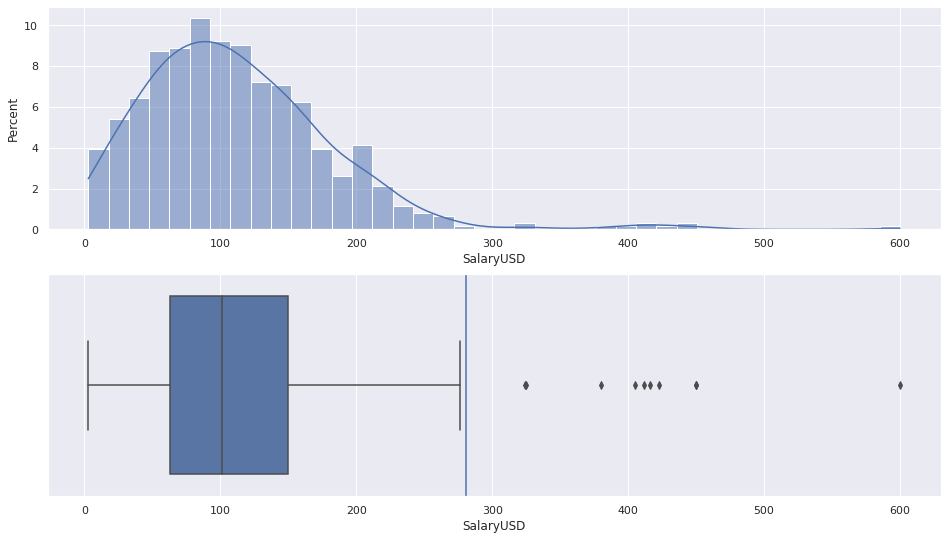

In [13]:
f, axes = plt.subplots(2, 1)
sns.histplot(data = df, x = "SalaryUSD", bins = 40, kde = True, ax = axes[0], stat = "percent")
sns.boxplot(data = df, x = "SalaryUSD", ax = axes[1])
axes[1].axvline(x = q3 + 1.5*iqr)
plt.show()

Eliminamos datos atípicos

In [14]:
#df = df.loc[df.SalaryUSD < q3 + 1.5*iqr]
df = df.where(df.SalaryUSD < q3 + 1.5*iqr)

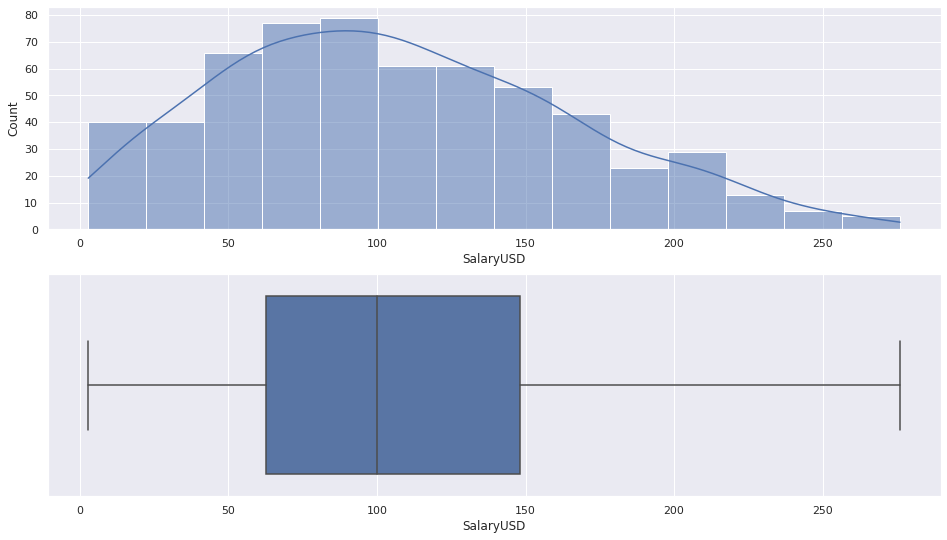

In [15]:
#sns.set(rc = {'figure.figsize':(12,9)})
f, axes = plt.subplots(2, 1)
sns.histplot(data = df, x = "SalaryUSD", kde = True, ax = axes[0])
sns.boxplot(data = df, x = "SalaryUSD",  ax = axes[1])
plt.show()

In [16]:
df.describe().SalaryUSD.round(decimals = 4)

count    597.0000
mean     107.1689
std       58.5555
min        2.8590
25%       62.6490
50%      100.0000
75%      148.2610
max      276.0000
Name: SalaryUSD, dtype: float64

### Año

Comenzando con las variables categóricas por el año,

In [17]:
df.WorkYear.value_counts()

2022.0    315
2021.0    213
2020.0     69
Name: WorkYear, dtype: int64

Notamos que hay 72 entradas de salarios en 2020, 217 salarios en 2021, y 318 entradas del 2022. A primera vista podría pensarse que esto indica un evidente incremento de trabajos a través del tiempo, pero debe tomarse encuenta que eso puede adjudicarse a otros factores.

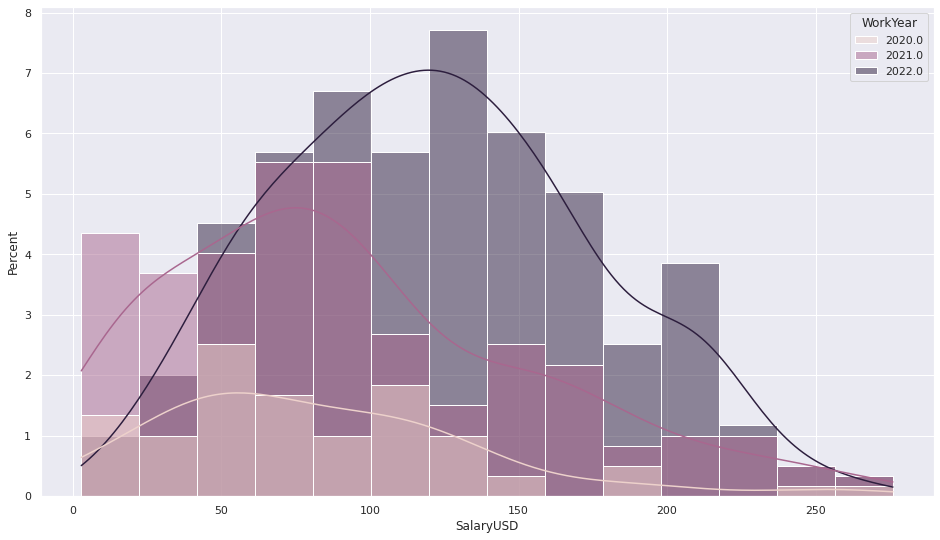

In [18]:
sns.histplot(data = df, x = "SalaryUSD", kde = True, stat = "percent", hue = "WorkYear")
plt.show()

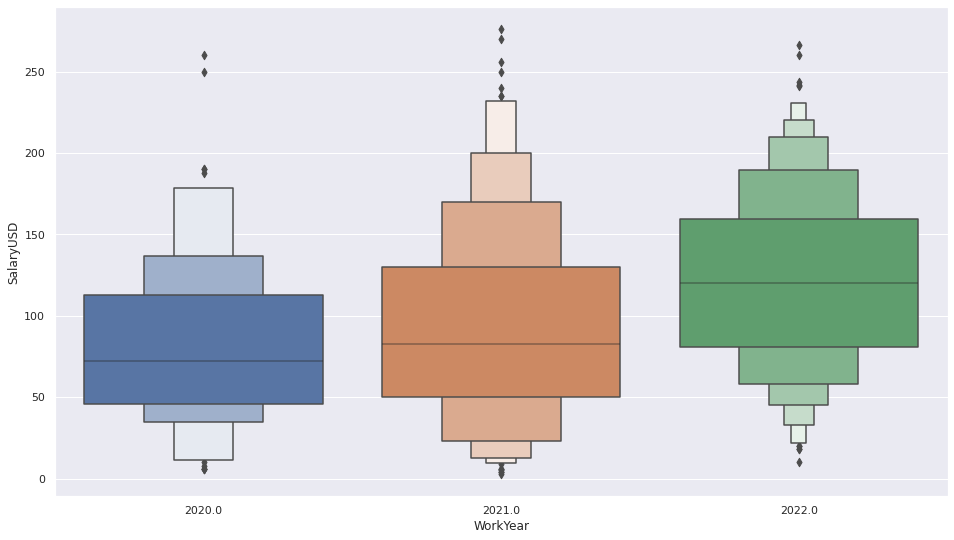

In [19]:
sns.boxenplot(data = df, x = "WorkYear", y = "SalaryUSD")
plt.show()

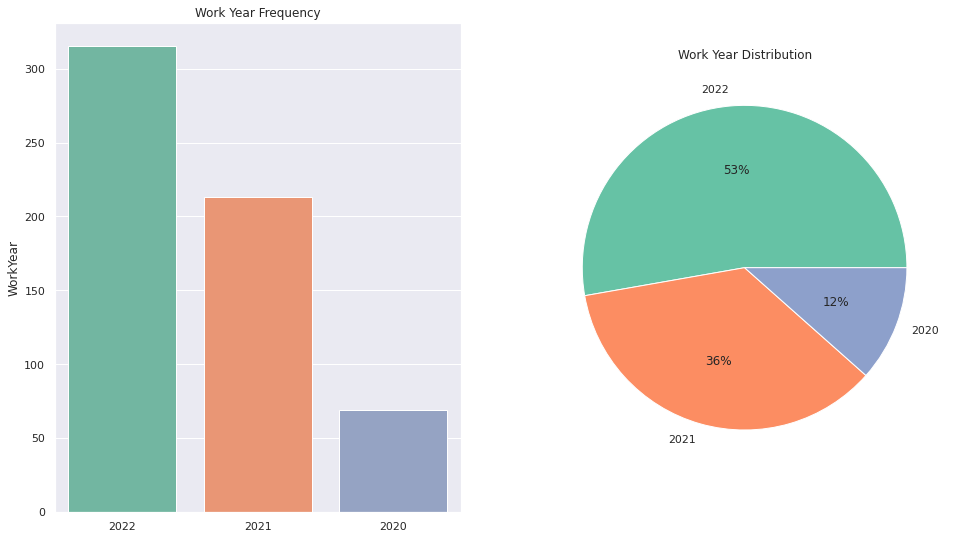

In [20]:
colors = sns.color_palette("Set2")[0:5]
fig, axes = plt.subplots(1,2)
sns.barplot(x = ["2022", "2021", "2020"],  y = df.WorkYear.value_counts(), ax = axes[0], palette = colors)
axes[0].set_title("Work Year Frequency")
axes[1].pie(df.WorkYear.value_counts(), labels = ["2022", "2021", "2020"], colors = colors, autopct='%.0f%%')
axes[1].set_title("Work Year Distribution")
plt.show()

In [21]:
df[["WorkYear", "SalaryUSD"]].groupby("WorkYear").mean()

,SalaryUSD
WorkYear,
2020.0,82.775884
2021.0,92.860437
2022.0,122.187295


### Nivel de Experiencia

Se prosigue con el nivel de experiencia,

In [22]:
df.ExperienceLevel.value_counts()
# EN: Entry-level or Junior / MI: Mid-level or intermediate / SE: Senior-level or expert / EX: Executive-level or Director

SE    277
MI    210
EN     88
EX     22
Name: ExperienceLevel, dtype: int64

notando que hay mayor prevalencia de nivel experto o alto nivel (SE) con 280 elementos, seguido por el nivel intermedio (MI) con 213; después se tienen 88 entradas de primer y segundo año (EN), y finalmente el nivel executivo o directivo (EX) con 26 registros.

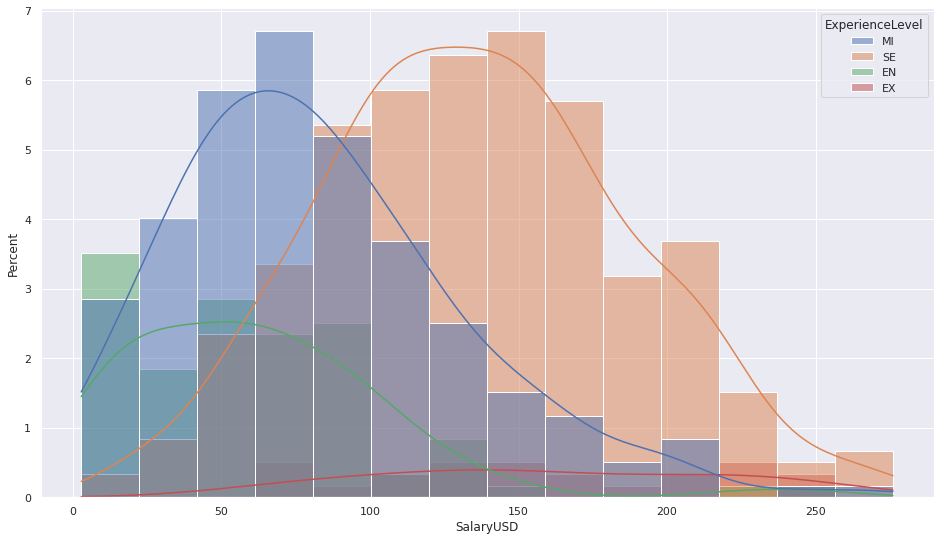

In [23]:
sns.histplot(data = df, x = "SalaryUSD", kde = True, stat = "percent", hue = "ExperienceLevel")
plt.show()

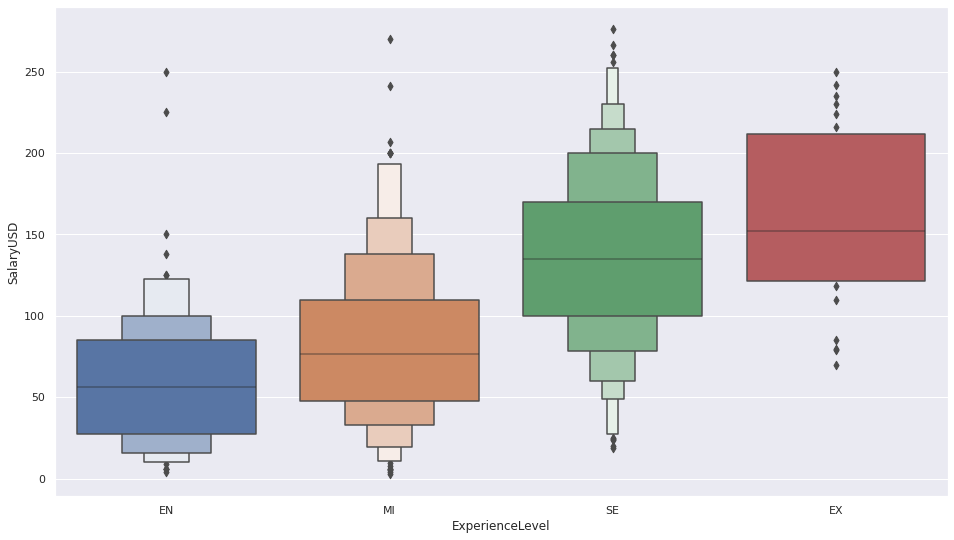

In [24]:
sns.boxenplot(data = df, x = "ExperienceLevel", y = "SalaryUSD", order = ["EN", "MI", "SE", "EX"])
plt.show()

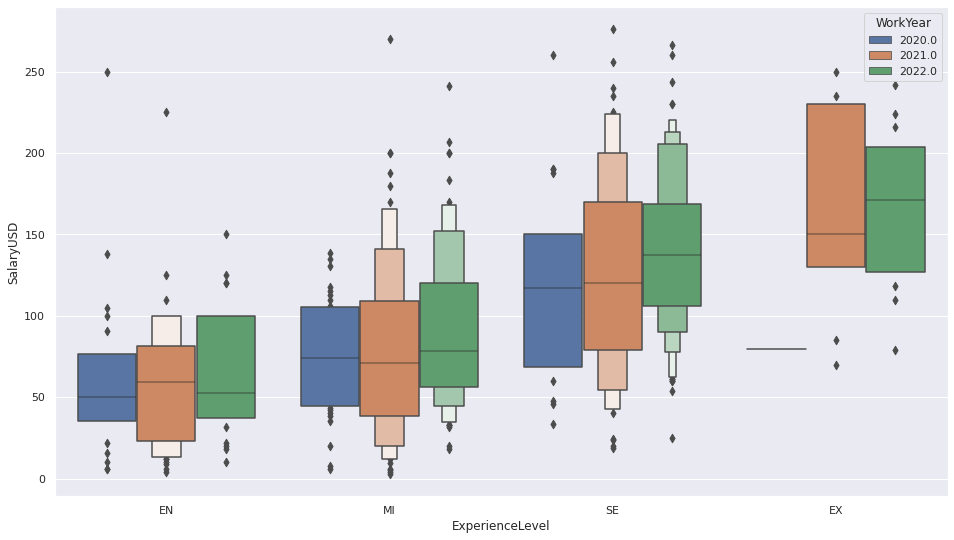

In [25]:
sns.boxenplot(data = df, x = "ExperienceLevel", y = "SalaryUSD", order = ["EN", "MI", "SE", "EX"], hue = "WorkYear")
plt.show()

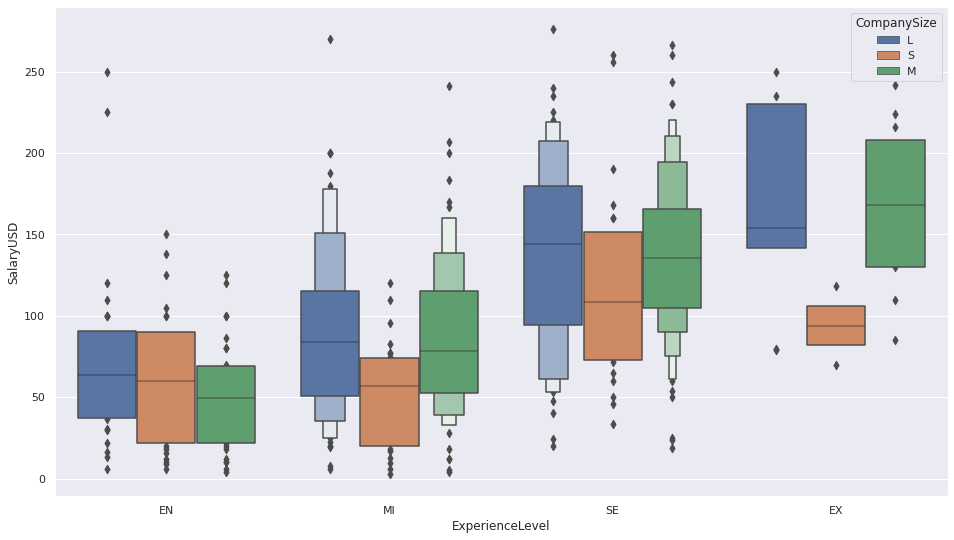

In [26]:
sns.boxenplot(data = df, x = "ExperienceLevel", y = "SalaryUSD", order = ["EN", "MI", "SE", "EX"], hue = "CompanySize")
plt.show()

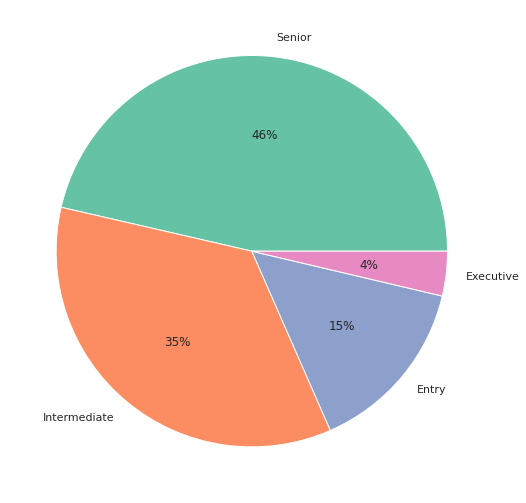

In [27]:
colors = sns.color_palette('Set2')[0:5]
L = ["Senior", "Intermediate", "Entry", "Executive"]
plt.pie(df.ExperienceLevel.value_counts(), labels = L, colors = colors, autopct='%.0f%%')
plt.show()

In [28]:
df.groupby("ExperienceLevel").get_group("EX").CompanySize.value_counts()

M    11
L     9
S     2
Name: CompanySize, dtype: int64

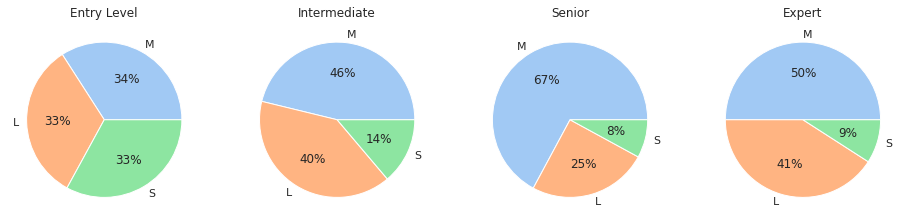

In [29]:
colors = sns.color_palette("pastel")#[0:5]
L = ["Small Company", "Medium Company", "Large Comapny"]
fig, axes = plt.subplots(1, 4)

axes[0].pie(df.groupby("ExperienceLevel").get_group("EN").CompanySize.value_counts(), 
            labels = df.groupby("ExperienceLevel").get_group("EN").CompanySize.value_counts().index, 
            colors = colors, 
            autopct='%.0f%%')
axes[0].set_title("Entry Level")

axes[1].pie(df.groupby("ExperienceLevel").get_group("MI").CompanySize.value_counts(), 
            labels = df.groupby("ExperienceLevel").get_group("MI").CompanySize.value_counts().index, 
            colors = colors, 
            autopct='%.0f%%')
axes[1].set_title("Intermediate")

axes[2].pie(df.groupby("ExperienceLevel").get_group("SE").CompanySize.value_counts(), 
            labels = df.groupby("ExperienceLevel").get_group("SE").CompanySize.value_counts().index, 
            colors = colors, 
            autopct='%.0f%%')
axes[2].set_title("Senior")

axes[3].pie(df.groupby("ExperienceLevel").get_group("EX").CompanySize.value_counts(), 
            labels = df.groupby("ExperienceLevel").get_group("EX").CompanySize.value_counts().index, 
            colors = colors, 
            autopct='%.0f%%')
axes[3].set_title("Expert")
plt.show()

### Tipo de Empleo

Luego se puede explorar el tipo de empleo,

In [30]:
df.EmploymentType.value_counts()
# PT: Part-time / FT: Full-time / CT: Contract / FL: Freelance

FT    579
PT     10
CT      4
FL      4
Name: EmploymentType, dtype: int64

viendo que domina el trabajo de tiempo completo (FT) con 588 elementos; el segundo lejano es el trabajo de medio tiempo (PT) con 10 salarios, le sigue el trabajo por contrato (CT) con 5 casos, y finalmente los independientes (FL, freelancer) con 4 registros.

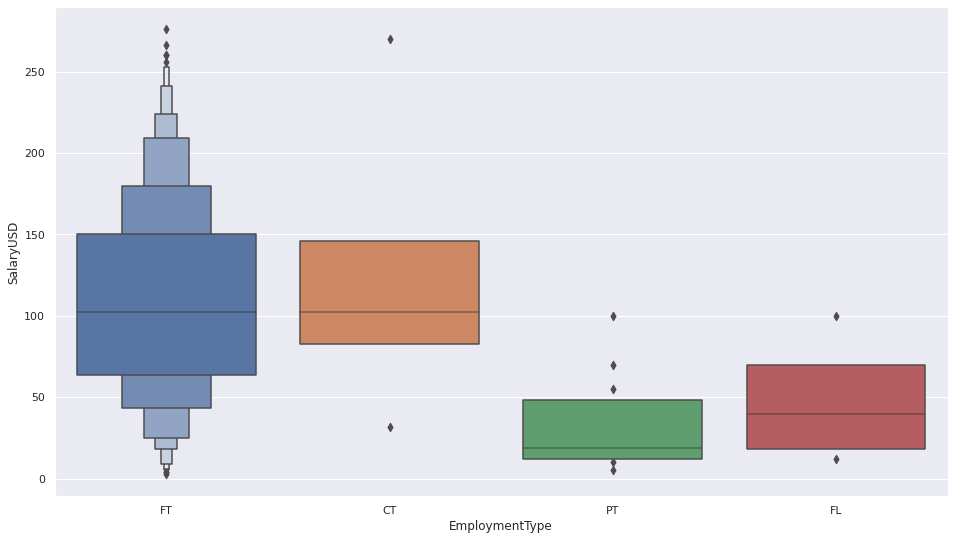

In [31]:
sns.boxenplot(data = df, x = "EmploymentType", y = "SalaryUSD")
plt.show()

In [32]:
np.round_(df.EmploymentType.value_counts()/len(df), decimals = 3)

FT    0.954
PT    0.016
CT    0.007
FL    0.007
Name: EmploymentType, dtype: float64

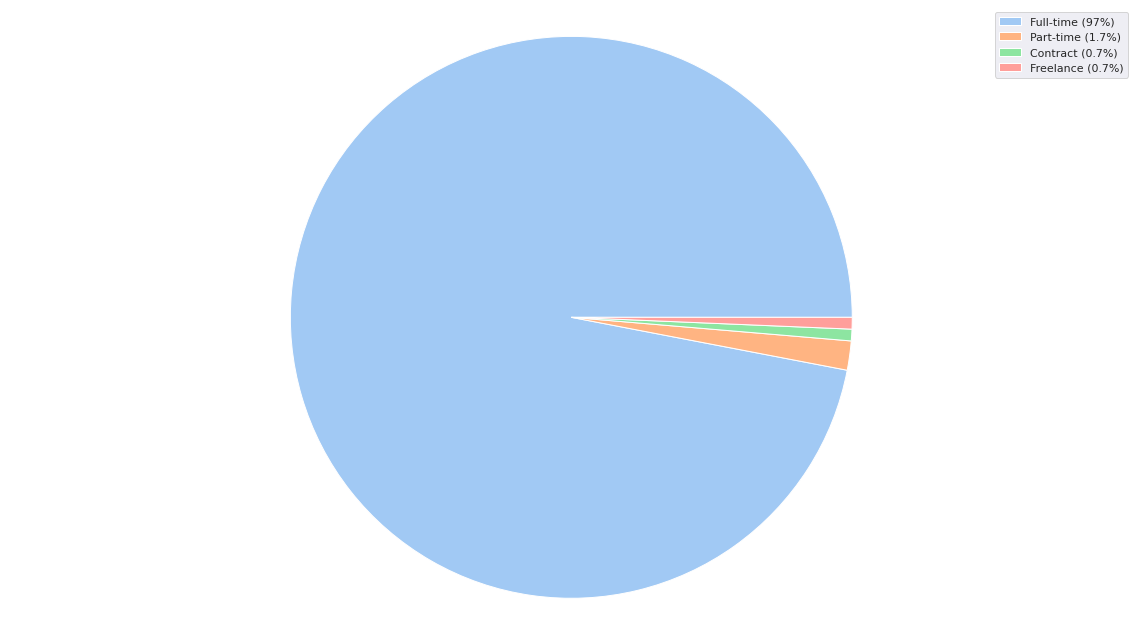

In [33]:
L = ["Full-time (97%)", "Part-time (1.7%)", "Contract (0.7%)", "Freelance (0.7%)"]
patches, texts = plt.pie(df.EmploymentType.value_counts(), colors = colors)
plt.legend(patches, L, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

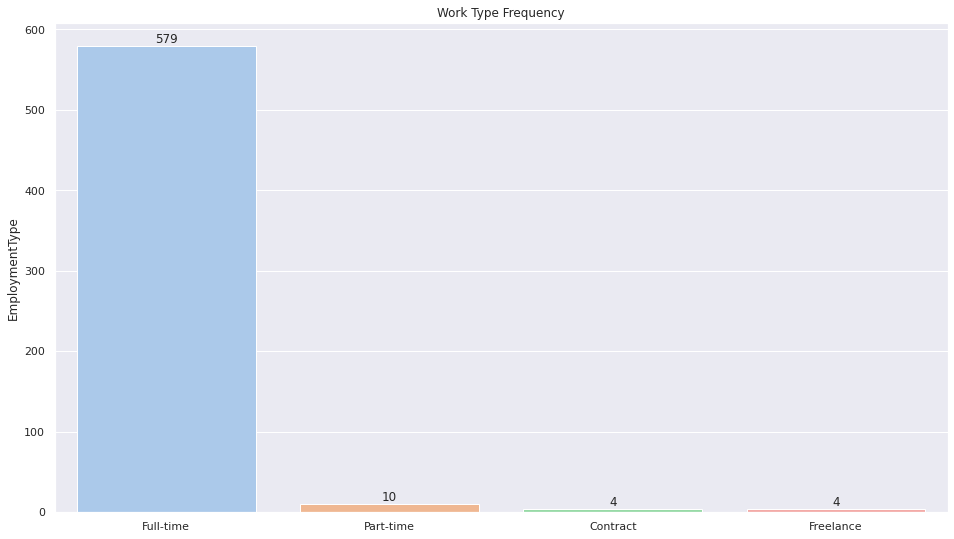

In [34]:
L = ["Full-time", "Part-time", "Contract", "Freelance"]
ax = sns.barplot(x = L,  y = df.EmploymentType.value_counts(), palette = colors)
ax.set_title("Work Type Frequency")
ax.bar_label(ax.containers[0])
plt.show()

### Puesto

Siguiendo con los diferentes títulos de cada salario,

In [35]:
df.JobTitle.value_counts()[0:10]

Data Scientist                142
Data Engineer                 131
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             15
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
AI Scientist                    7
Name: JobTitle, dtype: int64

se nota que hay muchos puestos similares, discutiblemente iguales pero con nombres diferentes; además, hay distinciones casi equivalentes al nivel de experiencia: los de nivel de ingreso no tienen título, pero quizá los de nivel medio, experto, o ejecutivo tengan los títulos "Lead", "Principal", "Head", "Manager", "Director", etc. Se puede corroborar esta conjetura,

In [36]:
df[["JobTitle", "ExperienceLevel"]].groupby("JobTitle").get_group("Lead Data Engineer").value_counts()

JobTitle            ExperienceLevel
Lead Data Engineer  SE                 4
                    EX                 1
                    MI                 1
dtype: int64

In [37]:
df[["JobTitle", "ExperienceLevel"]].groupby("JobTitle").get_group("Director of Data Science").value_counts()

JobTitle                  ExperienceLevel
Director of Data Science  EX                 5
                          SE                 1
dtype: int64

In [38]:
df[["JobTitle", "ExperienceLevel"]].groupby("JobTitle").get_group("Data Science Manager").value_counts()

JobTitle              ExperienceLevel
Data Science Manager  SE                 10
                      MI                  2
dtype: int64

In [39]:
df[["JobTitle", "ExperienceLevel"]].groupby("JobTitle").get_group("Principal Data Scientist").value_counts()

JobTitle                  ExperienceLevel
Principal Data Scientist  SE                 5
                          MI                 1
dtype: int64

In [40]:
df[["JobTitle", "ExperienceLevel"]].groupby("JobTitle").get_group("Head of Data").value_counts()

JobTitle      ExperienceLevel
Head of Data  EX                 2
              SE                 2
              MI                 1
dtype: int64

Parece ser que la conjetura es cierta de alguna manera; no obstante, la variación del nivel de experiencia incluso para el mismo puesto, además de la gran cantidad de puestos diferentes parecen indica que el nivel de experiencia podría ser un indicador más práctico. Podría desagregarse el nivel de experiencia para los puestos más populares, como Data Scientist, Data Engineer, Data Analyst, y Machine Learning Engineer.

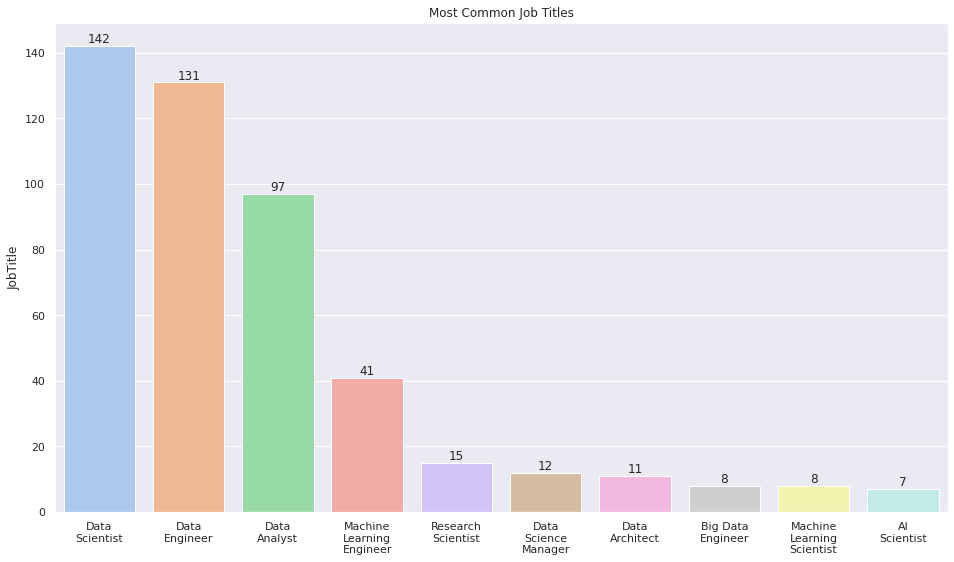

In [41]:
import textwrap
L = df.JobTitle.value_counts()[0:10].index
ax = sns.barplot(x = L,  y = df.JobTitle.value_counts()[0:10], palette = colors)
ax.set_title("Most Common Job Titles")
ax.bar_label(ax.containers[0])
ax.set_xticklabels([textwrap.fill(e, 9) for e in L])
plt.show()

In [42]:
ms = df.groupby("JobTitle").mean()["SalaryUSD"]
meanSalary = pd.DataFrame({"MeanSalary": ms, 
                           "N_Jobs": [df.groupby("JobTitle").get_group(title).JobTitle.value_counts()[0] for title in ms.index]})
meanSalary = meanSalary.sort_values(by = "N_Jobs", ascending = False)
meanSalary.head()

,MeanSalary,N_Jobs
JobTitle,,
Data Scientist,106.048310,142
Data Engineer,111.112214,131
Data Analyst,92.893062,97
Machine Learning Engineer,104.880146,41
Research Scientist,86.287467,15


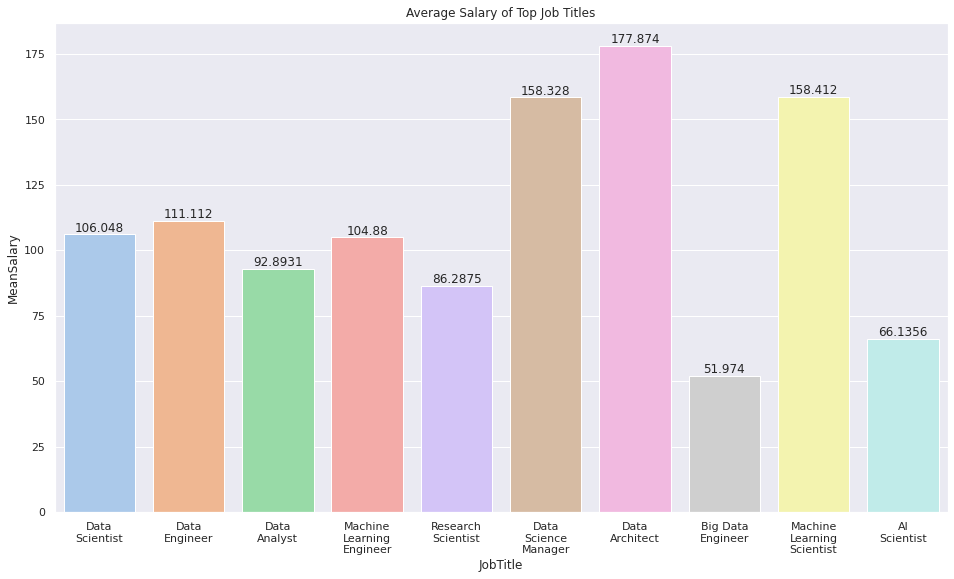

In [43]:
L = meanSalary.index[0:10]
ax = sns.barplot(x = L,  y = meanSalary.MeanSalary[0:10], palette = colors)
ax.set_title("Average Salary of Top Job Titles")
ax.bar_label(ax.containers[0])
ax.set_xticklabels([textwrap.fill(e, 9) for e in L])
plt.show()

In [44]:
meanSalary = meanSalary.sort_values(by = "MeanSalary", ascending = False)
meanSalary.head()

,MeanSalary,N_Jobs
JobTitle,,
Principal Data Engineer,192.500000,2
Principal Data Scientist,181.782833,6
Data Architect,177.873909,11
Analytics Engineer,175.000000,4
Director of Data Science,173.419667,6


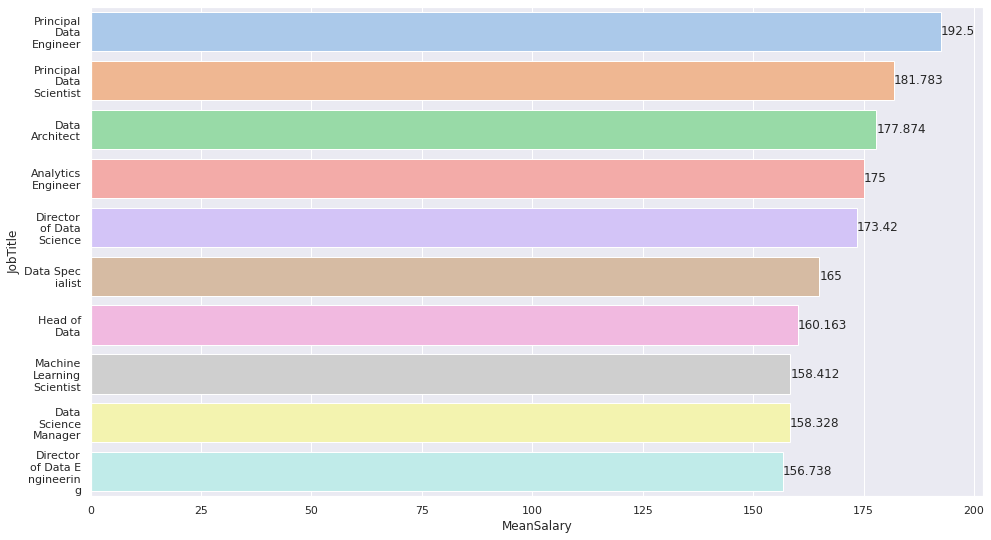

In [45]:
L = meanSalary.index[0:10]
ax = sns.barplot(y = L,  x = meanSalary.MeanSalary[0:10], palette = colors, orient = "h")
ax.bar_label(ax.containers[0])
ax.set_yticklabels([textwrap.fill(e, 9) for e in L])
plt.show()

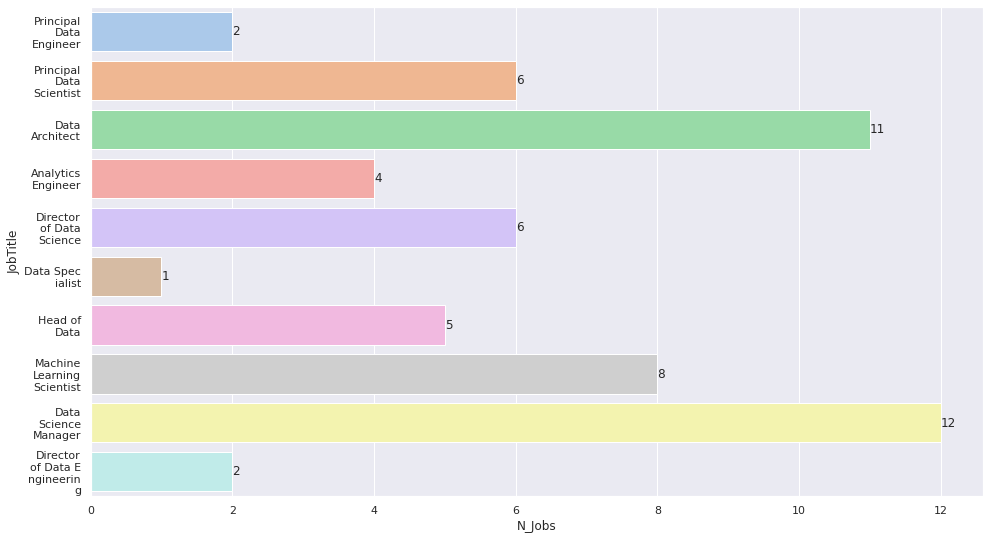

In [46]:
L = meanSalary.index[0:10]
ax = sns.barplot(y = L,  x = meanSalary.N_Jobs[0:10], palette = colors, orient = "h")
ax.bar_label(ax.containers[0])
ax.set_yticklabels([textwrap.fill(e, 9) for e in L])
plt.show()

In [47]:
M = df[["JobTitle", "SalaryUSD"]].groupby("JobTitle").get_group("Data Scientist")
for i in df.JobTitle.value_counts().index[1:11]:
  j = df[["JobTitle", "SalaryUSD"]].groupby("JobTitle").get_group(i)
  M = pd.concat([M, j])

In [48]:
#sns.histplot(data = M, x = "SalaryUSD", kde = True, stat = "percent", hue = "JobTitle")
#plt.show()

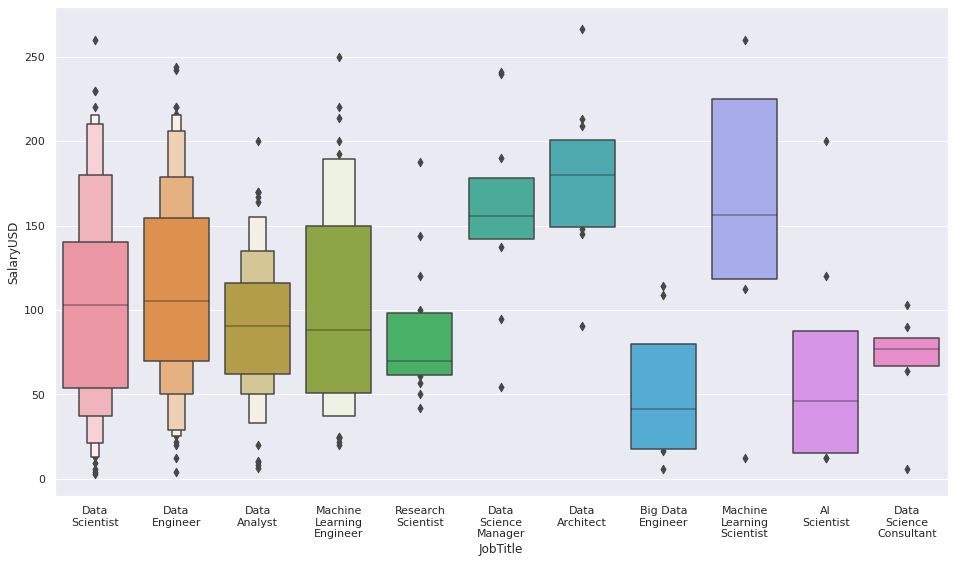

In [49]:
L = M.JobTitle.value_counts().index
ax = sns.boxenplot(data = M, x = "JobTitle", y = "SalaryUSD")
ax.set_xticklabels([textwrap.fill(e, 10) for e in L])
plt.show()

### Residencia

Se prosigue con el lugar de residencia,

In [50]:
df.Residence.value_counts()[0:10]

US    322
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: Residence, dtype: int64

y es notable la gran cantidad de residentes de Estados unidos, seguidos lejanamente por Gran Bretaña, Indonesia, Canadá, Dinamarca, Francia, etc.

In [51]:
Resi = df[["Residence", "SalaryUSD"]].groupby("Residence").get_group("US")
for i in df.Residence.value_counts().index[1:11]:
  j = df[["Residence", "SalaryUSD"]].groupby("Residence").get_group(i)
  Resi = pd.concat([Resi, j])

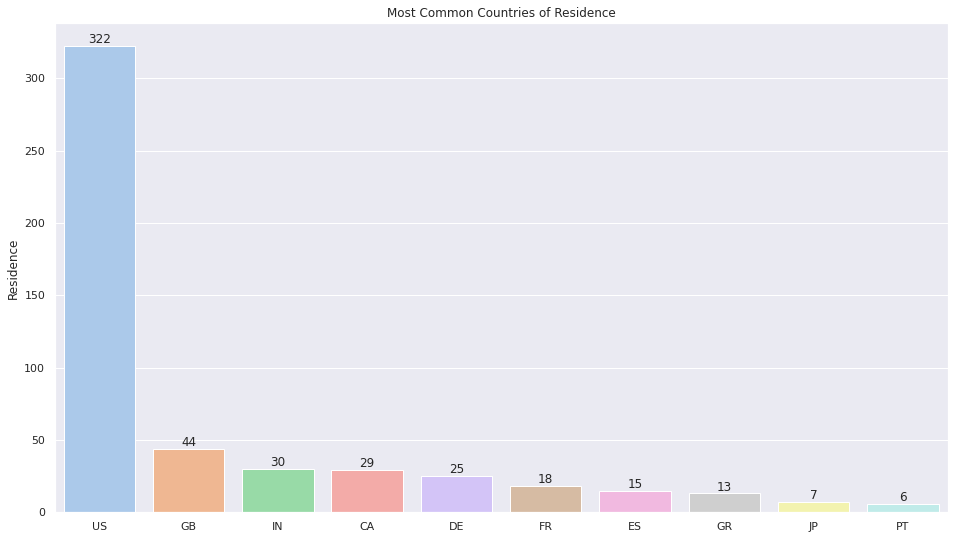

In [52]:
L = Resi.Residence.value_counts().index[0:10]

ax = sns.barplot(x = L,  y = Resi.Residence.value_counts()[0:10], palette = colors)
ax.set_title("Most Common Countries of Residence")
ax.bar_label(ax.containers[0])
ax.set_xticklabels([textwrap.fill(e, 9) for e in L])
plt.show()

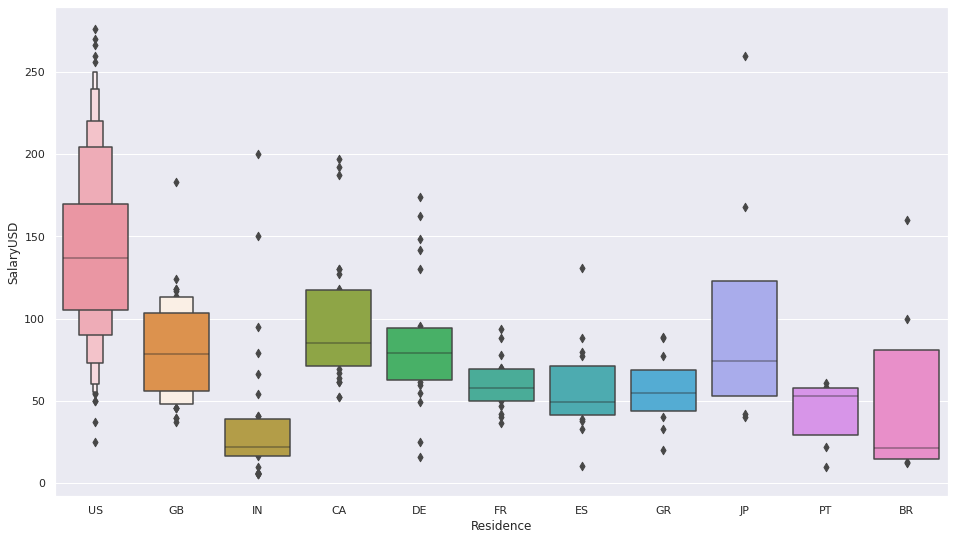

In [53]:
ax = sns.boxenplot(data = Resi, x = "Residence", y = "SalaryUSD")
#ax.set_xticklabels([textwrap.fill(e, 9) for e in L])
plt.show()

### Razón de trabajo remoto

 Lo siguiente es la razón de trabajo remoto,

In [54]:
df.RemoteRatio.value_counts()

100.0    373
0.0      126
50.0      98
Name: RemoteRatio, dtype: int64

en donde hay una distribución un poco más uniforme, aunque el trabajo 100% presencial domina los registros del Data Frame. 

In [55]:
Rem = df[["RemoteRatio", "Residence", "CompanyLocation"]].groupby("RemoteRatio").get_group(0)
(Rem.Residence != Rem.CompanyLocation).sum()

4

In [56]:
RemFalse = Rem.loc[Rem.Residence != Rem.CompanyLocation]
RemFalse.head()
df = df.drop(index = RemFalse.index)

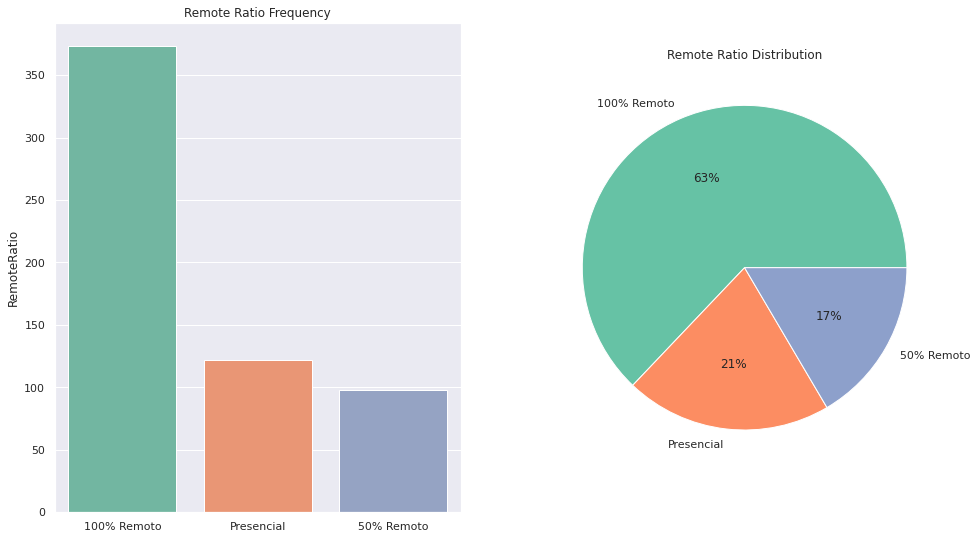

In [57]:
colors = sns.color_palette("Set2")[0:5]
L = ["100% Remoto", "Presencial", "50% Remoto"]
fig, axes = plt.subplots(1,2)
sns.barplot(x = L,  y = df.RemoteRatio.value_counts(), ax = axes[0], palette = colors)
axes[0].set_title("Remote Ratio Frequency")
axes[1].pie(df.RemoteRatio.value_counts(), labels = L, colors = colors, autopct='%.0f%%')
axes[1].set_title("Remote Ratio Distribution")
plt.show()

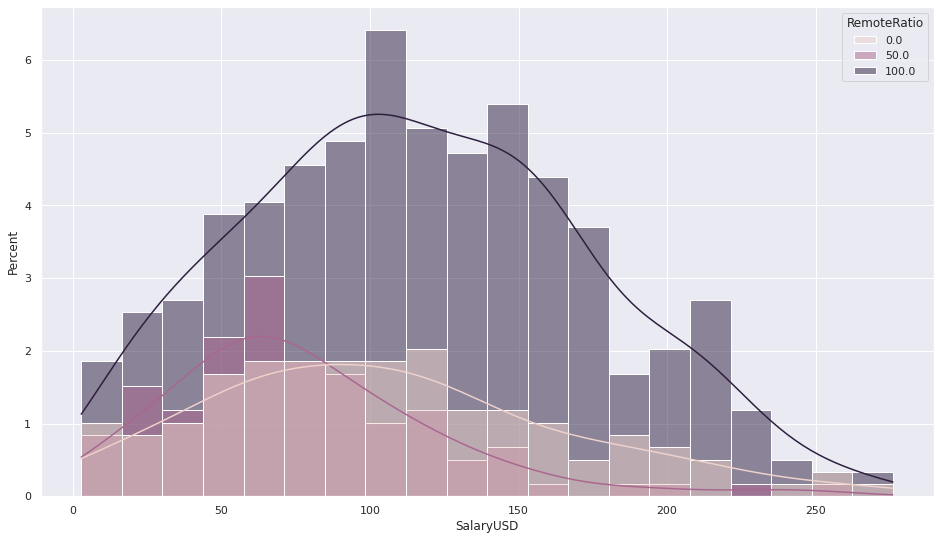

In [58]:
sns.histplot(data = df, x = "SalaryUSD", kde = True, stat = "percent", hue = "RemoteRatio", bins = 20)
plt.show()

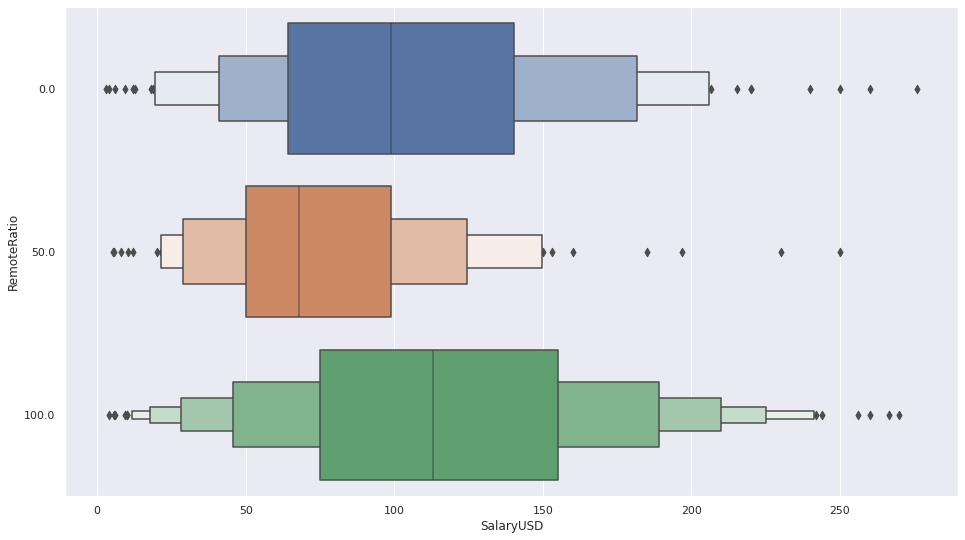

In [59]:
ax = sns.boxenplot(data = df, y = "RemoteRatio", x = "SalaryUSD", orient = "h")
plt.show()

### Ubicación de las Empresas

La observación de trabajo remoto parece sugerir que una buena proporción de las compañías estarán localizadas en Estados Unidos, Reino Unido, etc.

In [60]:
df.CompanyLocation.value_counts()[0:10]

US    343
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: CompanyLocation, dtype: int64

Se observa que Estados Unidos, Reino Unido, Canadá, tienen más empresas que residentes, lo cual hace sentido debido a la gran proporción de trabajo remoto.

In [61]:
CLoc = df[["CompanyLocation", "SalaryUSD"]].groupby("CompanyLocation").get_group("US")
for i in df.Residence.value_counts().index[1:10]:
  j = df[["CompanyLocation", "SalaryUSD"]].groupby("CompanyLocation").get_group(i)
  CLoc = pd.concat([CLoc, j])

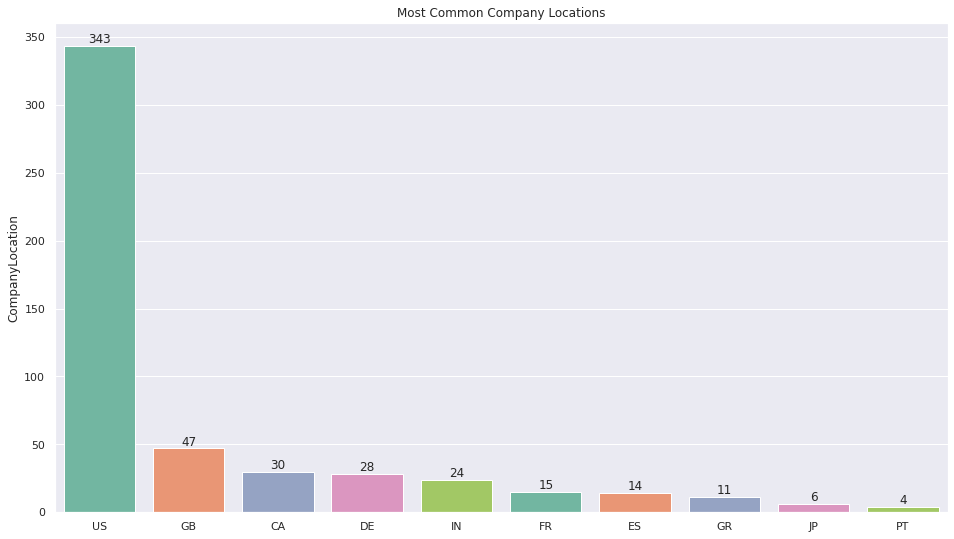

In [62]:
L = CLoc.CompanyLocation.value_counts().index[0:10]

ax = sns.barplot(x = L,  y = CLoc.CompanyLocation.value_counts()[0:10], palette = colors)
ax.set_title("Most Common Company Locations")
ax.bar_label(ax.containers[0])
ax.set_xticklabels([textwrap.fill(e, 9) for e in L])
plt.show()

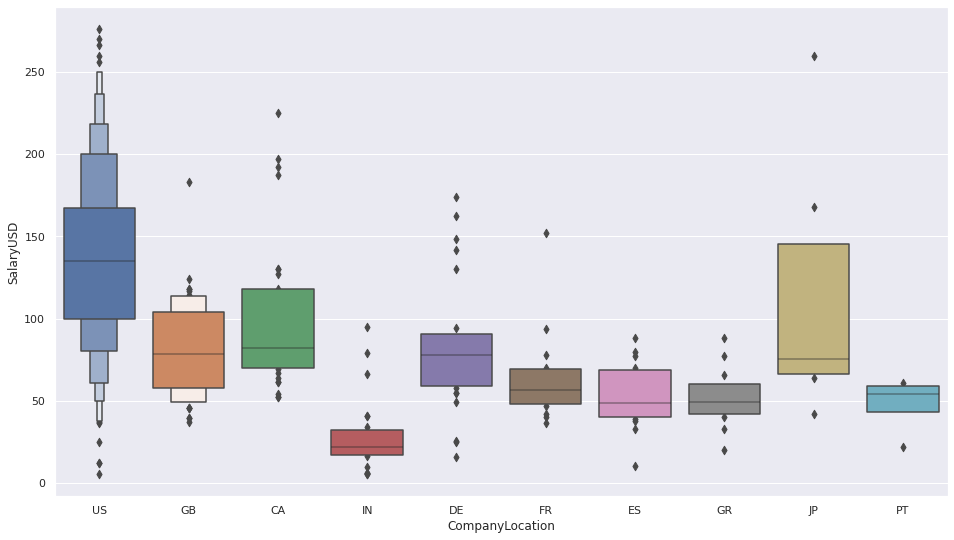

In [63]:
ax = sns.boxenplot(data = CLoc, x = "CompanyLocation", y = "SalaryUSD")
#ax.set_xticklabels([textwrap.fill(e, 9) for e in L])
plt.show()

### Tamaño de la empresa

Finalmente se explora el tamaño de las empresas,

In [64]:
df.CompanySize.value_counts()

M    324
L    187
S     82
Name: CompanySize, dtype: int64

viendo que hay una buena distribución de tamaños; aunque se esperaría la distribución típica de empresas (disminuyendo en cantidad en función del tamaño), en este conjunto de datos se tiene una mayor cantidad de empresas medianas, seguido de las empresas grandes, y finalmente la menor cantidad de empresas es de tamaño pequeño.

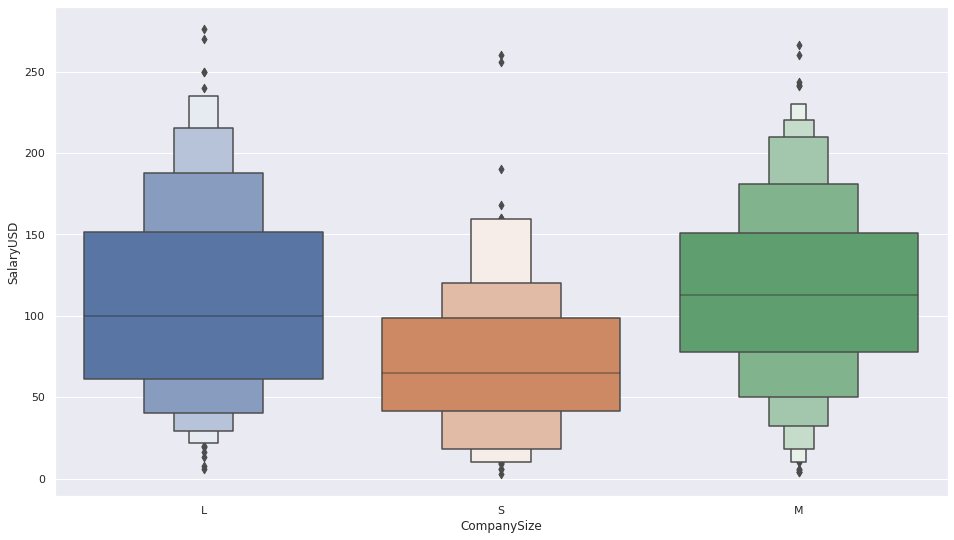

In [65]:
sns.boxenplot(data = df, x = "CompanySize", y = "SalaryUSD")
#b = sns.stripplot(data = df, x = "CompanySize", y = "SalaryUSD", color = "black", linewidth = 1, alpha = 0.4)
plt.show()

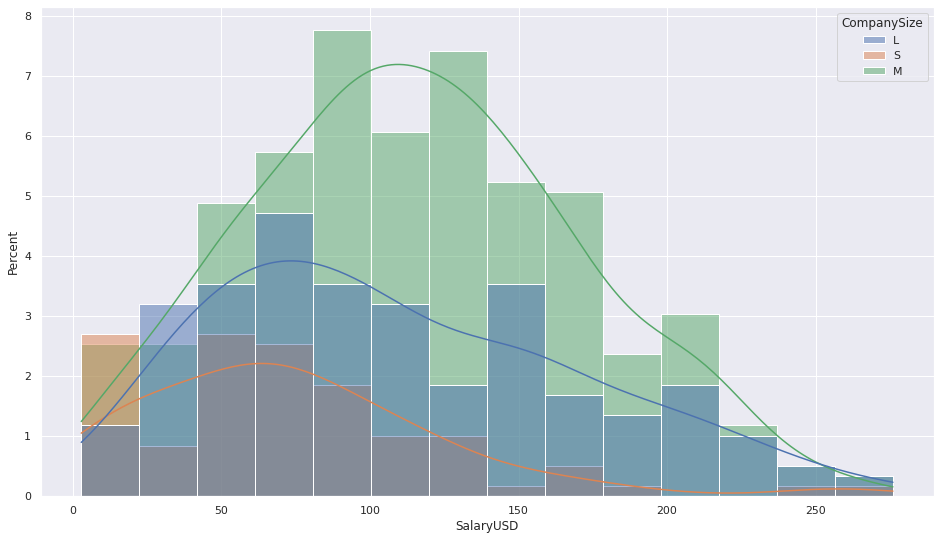

In [66]:
sns.histplot(data = df, x = "SalaryUSD", kde = True, stat = "percent", hue = "CompanySize")
plt.show()

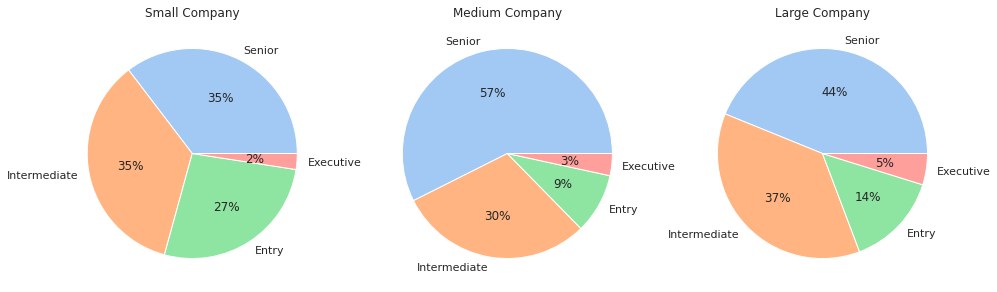

In [67]:
colors = sns.color_palette("pastel")#[0:5]
L = ["Senior", "Intermediate", "Entry", "Executive"]
fig, axes = plt.subplots(1, 3)
axes[0].pie(df.groupby("CompanySize").get_group("S").ExperienceLevel.value_counts(), labels = L, colors = colors, autopct='%.0f%%')
axes[0].set_title("Small Company")
axes[1].pie(df.groupby("CompanySize").get_group("M").ExperienceLevel.value_counts(), labels = L, colors = colors, autopct='%.0f%%')
axes[1].set_title("Medium Company")
axes[2].pie(df.groupby("CompanySize").get_group("L").ExperienceLevel.value_counts(), labels = L, colors = colors, autopct='%.0f%%')
axes[2].set_title("Large Company")
plt.show()

### Correlación entre variables

<AxesSubplot:>

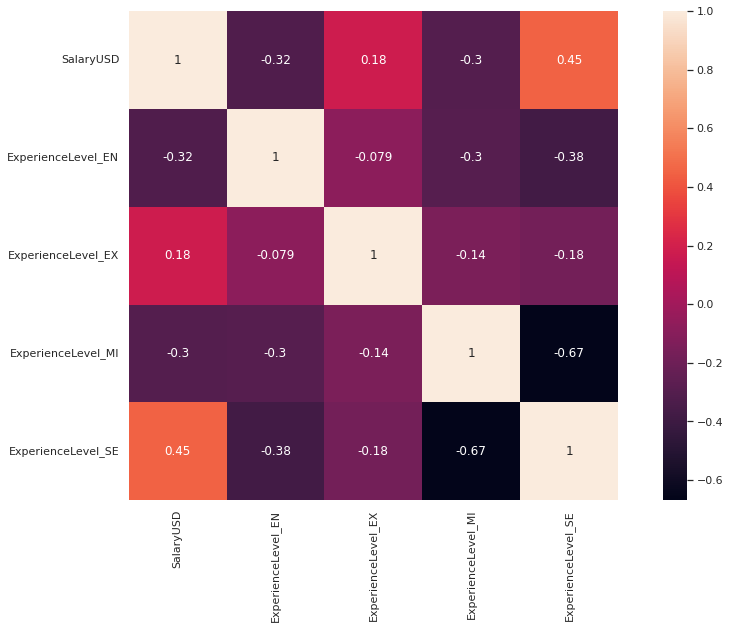

In [71]:
CorrM = df[["SalaryUSD", "ExperienceLevel"]]
CorrM = pd.get_dummies(CorrM, columns = ["ExperienceLevel"])
sns.heatmap(CorrM.corr(), square = True, annot = True)

<AxesSubplot:>

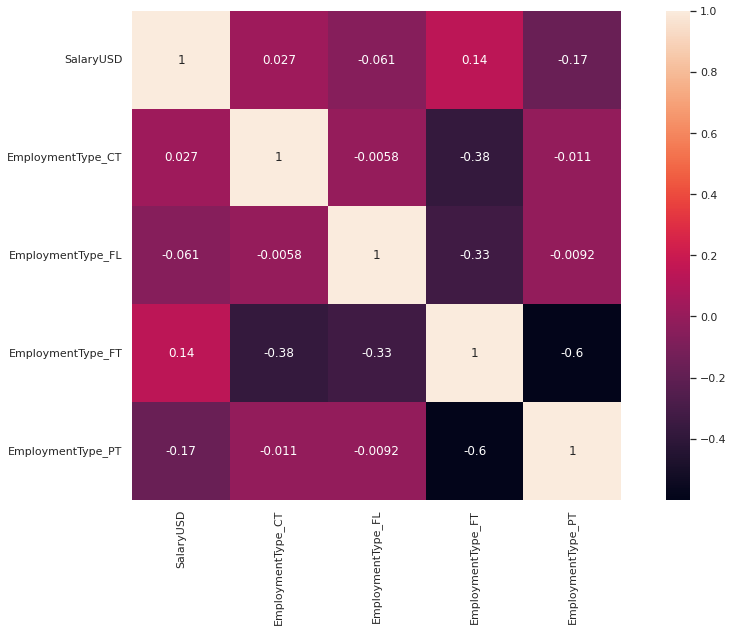

In [72]:
CorrM = df[["SalaryUSD", "EmploymentType"]]
CorrM = pd.get_dummies(CorrM, columns = ["EmploymentType"])
sns.heatmap(CorrM.corr(), square = True, annot = True)

<AxesSubplot:>

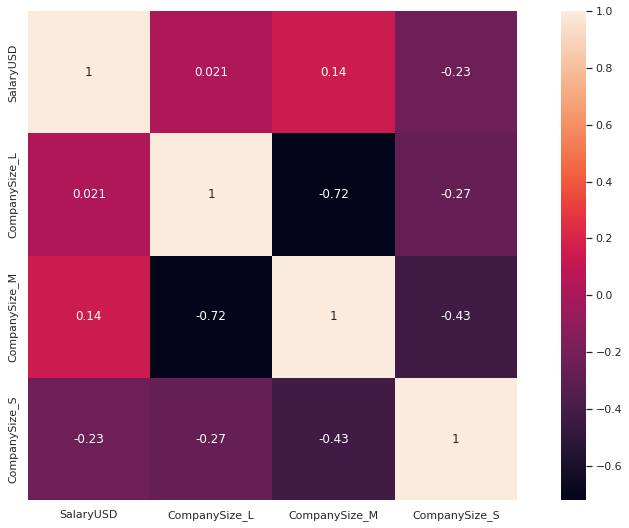

In [73]:
CorrM = df[["SalaryUSD", "CompanySize"]]
CorrM = pd.get_dummies(CorrM, columns = ["CompanySize"])
sns.heatmap(CorrM.corr(), square = True, annot = True)

<AxesSubplot:>

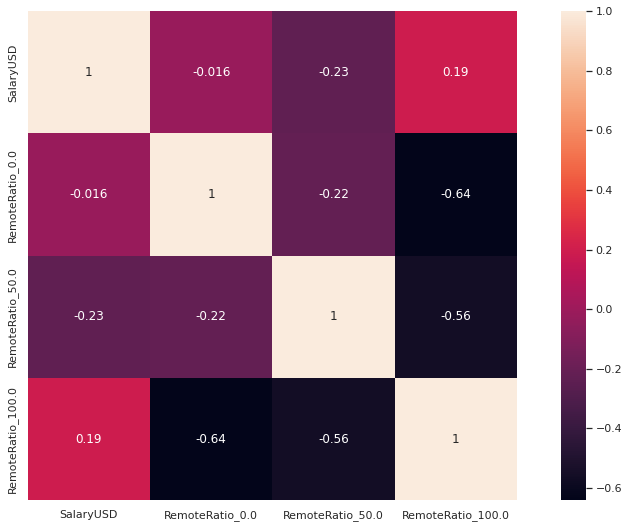

In [74]:
CorrM = df[["SalaryUSD", "RemoteRatio"]]
CorrM = pd.get_dummies(CorrM, columns = ["RemoteRatio"])
sns.heatmap(CorrM.corr(), square = True, annot = True)

## Manipulación del Data Frame

Habiendo explorado las características básicas de nuestro conjunto de datos, se procede a escoger los criterios de análisis:

- Salarios en función del puesto, controlando para la experiencia
- Salarios en función de la experiencia, controlando para la ubicación de la empresa.
- Salarios en función de la ubicación de la empresa, controlando para el tamaño de la empresa.

Por lo tanto, se efectúan las siguientes modificaciones al arreglo:

- **Eliminar Salario y Moneda**: ya se tiene un salario homogéneo en USD, por lo que mantener estas columnas resulta redundante.
- **Eliminar Residencia, Ubicación de la empresa, Tipo de trabajo y Razón de trabajo remoto**: el análisis se enfocará en los criterios listados anteriormente, por lo que es posible prescindir de estas columnas.

In [75]:
df = df.drop(columns = ["Salary", "EmploymentType", "Currency", "Residence", "RemoteRatio"])

In [76]:
df.head(-1)

,WorkYear,ExperienceLevel,JobTitle,SalaryUSD,CompanyLocation,CompanySize
0,2020.0,MI,Data Scientist,79.833,DE,L
1,2020.0,SE,Machine Learning Scientist,260.000,JP,S
2,2020.0,SE,Big Data Engineer,109.024,GB,M
3,2020.0,MI,Product Data Analyst,20.000,HN,S
4,2020.0,SE,Machine Learning Engineer,150.000,US,L
...,...,...,...,...,...,...
601,2022.0,EN,Data Analyst,52.000,CA,M
602,2022.0,SE,Data Engineer,154.000,US,M
603,2022.0,SE,Data Engineer,126.000,US,M
604,2022.0,SE,Data Analyst,129.000,US,M


Finalmente, se realiza una modificación muy importante: un escalamiento estándar de los Salarios en USD. Esto con el fin de tener una escala manejable y fácilmente interpretable en términos de desviaciones estándar.

In [77]:
df["SalaryUSD"] = (df.SalaryUSD - df.SalaryUSD.mean())/df.SalaryUSD.std()

Podemos ver sus medidas de tendencia central y dispersión actualizadas:

In [78]:
np.round_(df.SalaryUSD.describe(), decimals = 4)

count    593.0000
mean       0.0000
std        1.0000
min       -1.7942
25%       -0.7690
50%       -0.1308
75%        0.7254
max        2.8831
Name: SalaryUSD, dtype: float64

# Pregunta 1
¿El salario promedio en Estados Unidos de un Data Engineer es mayor al salario promedio de un Data Scientist con el mismo nivel de experiencia?
1. **Caso 1**: nivel de experiencia Experto (SE)
2. **Caso 2**: nivel de experiencia Intermedio (MI)

## Subconjunto de datos

In [79]:
P1 = df.groupby("JobTitle").get_group("Data Scientist")
P1 = pd.concat([P1, df.groupby("JobTitle").get_group("Data Engineer")])
#P1 = P1.groupby("CompanyLocation").get_group("US")
P1 = P1.drop(columns = ["WorkYear", "CompanySize"])
P1.head(-1)

,ExperienceLevel,JobTitle,SalaryUSD,CompanyLocation
0,MI,Data Scientist,-0.476089,DE
7,MI,Data Scientist,-1.231219,HU
10,EN,Data Scientist,-0.964326,FR
11,MI,Data Scientist,-1.149949,IN
12,EN,Data Scientist,-1.159624,FR
...,...,...,...,...
578,SE,Data Engineer,-0.130751,US
579,SE,Data Engineer,-1.415044,US
582,SE,Data Engineer,1.925999,US
583,SE,Data Engineer,0.898052,US


In [80]:
P1.ExperienceLevel.value_counts()

SE    123
MI    111
EN     34
EX      3
Name: ExperienceLevel, dtype: int64

In [81]:
P1.JobTitle.value_counts()

Data Scientist    142
Data Engineer     129
Name: JobTitle, dtype: int64

In [82]:
P1.describe()

,SalaryUSD
count,271.000000
mean,0.025231
std,0.970818
min,-1.794184
25%,-0.718212
50%,-0.050235
75%,0.699757
max,2.609072


## Senior Level

In [83]:
P1_Senior = P1.groupby("ExperienceLevel").get_group("SE")

In [84]:
P1_Senior.JobTitle.value_counts()

Data Engineer     63
Data Scientist    60
Name: JobTitle, dtype: int64

In [85]:
seniorDataScientists = P1_Senior.groupby("JobTitle").get_group("Data Scientist").SalaryUSD
seniorDataScientists.describe()[1:3]

mean    0.702392
std     0.835757
Name: SalaryUSD, dtype: float64

In [86]:
seniorDataEngineers = P1_Senior.groupby("JobTitle").get_group("Data Engineer").SalaryUSD
seniorDataEngineers.describe()[1:3]

mean    0.503446
std     0.800659
Name: SalaryUSD, dtype: float64

### Pruebas de normalidad

Primero para los salarios de los Data Scientists

Alpha: 0.05
p-value: 0.0


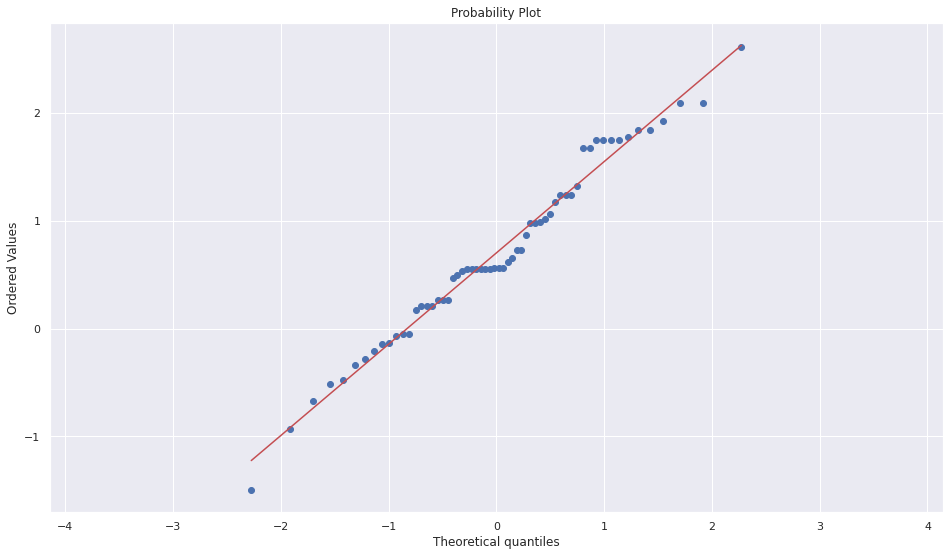

In [87]:
ks_stat, ks_pvalue = kstest(seniorDataScientists.dropna(), 'norm')
print("Alpha: 0.05")
print("p-value: " + str(round(ks_pvalue, 4)))

stats.probplot(seniorDataScientists.dropna(), fit = True, plot = plt)
plt.axis('equal')
plt.show()

Y vemos que se rechaza $H_o$. Por lo tanto, se dice que los salarios de los Data Scientists no se distribuyen normalmente. Hacemos lo mismo para los salarios de los Data Engineers,

Alpha: 0.05
p-value: 0.0001


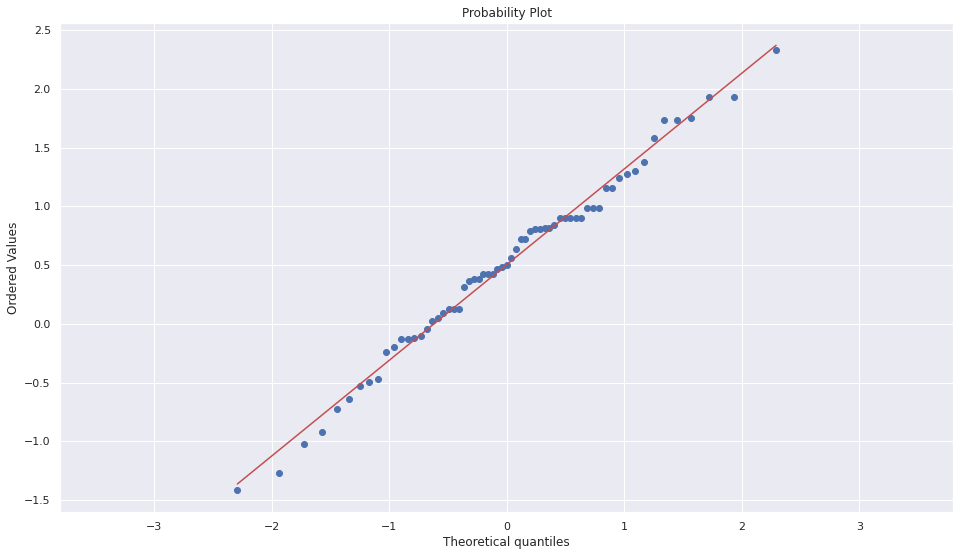

In [88]:
ks_stat, ks_pvalue = kstest(seniorDataEngineers.dropna(), 'norm')
print("Alpha: 0.05")
print("p-value: " + str(round(ks_pvalue, 4)))

stats.probplot(seniorDataEngineers.dropna(), fit = True, plot = plt)
plt.axis('equal')
plt.show()

observando que puede decirse lo mismo: se rechaza $H_o$ y por lo tanto los salarios de los Data Engineers tampoco se distribuyen normalmente.

### Prueba de hipótesis de varianza

Debido a que los datos no siguen una distribución normal y no se conoce la desviación estándar de las poblaciones, se opta por utilizar una prueba de hipótesis con una distribución t de Student. Para esto es conveniente realizar una prueba de hipótesis de varianza, ya que la prueba T cambia si las varianzas difieren. Entonces se opta por una prueba de Levene con un $\alpha = 0.05$,

In [89]:
#Prueba de varianzas entre las distribuciones
levene_stat, l_pvalue = stats.levene(seniorDataScientists, seniorDataEngineers)
print("Alpha: 0.05")
print("p-value: " + str(round(l_pvalue, 4)))

Alpha: 0.05
p-value: 0.8458


No se rechaza $H_o$, por lo cual puede afirmarse con un nivel de significancia del 95% que las varianzas poblacionales son iguales.

### Prueba de hipótesis

Se procede entonces con la siguiente prueba de hipótesis

$H_o: ~\mu_1 = \mu_2$,

$H_1: ~\mu_1 > \mu_2$,

donde $\mu_1$ es el salario promedio (poblacional) de un Data Engineer, y $\mu_2$ es el salario promedio (poblacional) de un Data Scientist. Para un $\alpha = 0.05$.

Para esta prueba de hipótesis debe usarse un estadístico de prueba
$$
T = \frac{\bar{X} - \bar{Y} - (\mu_1 - \mu_2)}{\sqrt{\frac{s_1^2}{m} + \frac{s_2^2}{n}}}
$$
donde $\bar{X}$ es la media muestral de los salarios de un Data Scientist, $\bar{Y}$ es la media muestral de los salarios de un Data Engineer, $s_1$ y $s_2$ son las desviaciones muestrales de los salarios de un Data Scientist y Engineer respectivamente, y $m$ y $n$ son los respectivos tamaños de las muestras.

In [90]:
#Prueba t
t_stat, pvalue = stats.ttest_ind(a = seniorDataEngineers, b = seniorDataScientists, alternative = "greater", equal_var=True)
#pvalue = 1 - P
print("Alpha: 0.05")
print("p-value: " + str(round(pvalue, 4)))

Alpha: 0.05
p-value: 0.91


No se rechaza $H_o$. No hay evidencia suficiente para afirmar que el sueldo promedio de un Data Engineer es mayor al de un Data Scientist (Internacional)

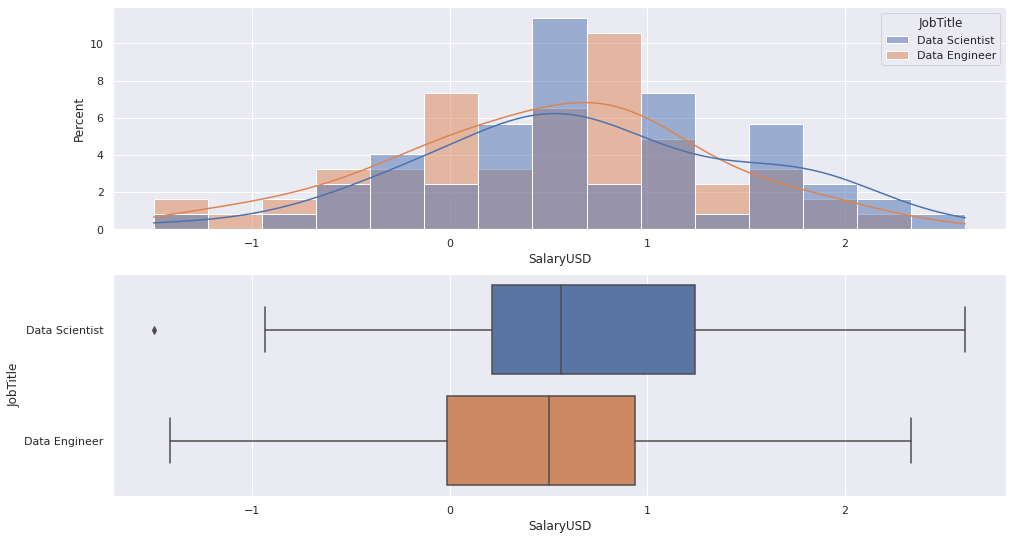

In [91]:
fig, ax = plt.subplots(2, 1)
sns.histplot(data = P1_Senior, x = "SalaryUSD", kde = True, stat = "percent", hue = "JobTitle", ax = ax[0], bins = 15)
sns.boxplot(data = P1_Senior, x = "SalaryUSD", y = "JobTitle", ax = ax[1])
plt.show()

## Intermediate Level

In [92]:
P1_Inter = P1.groupby("ExperienceLevel").get_group("MI")

In [93]:
P1_Inter.JobTitle.value_counts()

Data Scientist    60
Data Engineer     51
Name: JobTitle, dtype: int64

In [94]:
interDataScientists = P1_Inter.groupby("JobTitle").get_group("Data Scientist").SalaryUSD
interDataScientists.describe()[1:3]

mean   -0.438311
std     0.802590
Name: SalaryUSD, dtype: float64

In [95]:
interDataEngineers = P1_Inter.groupby("JobTitle").get_group("Data Engineer").SalaryUSD
interDataEngineers.describe()[1:3]

mean   -0.328437
std     0.744879
Name: SalaryUSD, dtype: float64

### Pruebas de normalidad

Alpha: 0.05
p-value: 0.0015


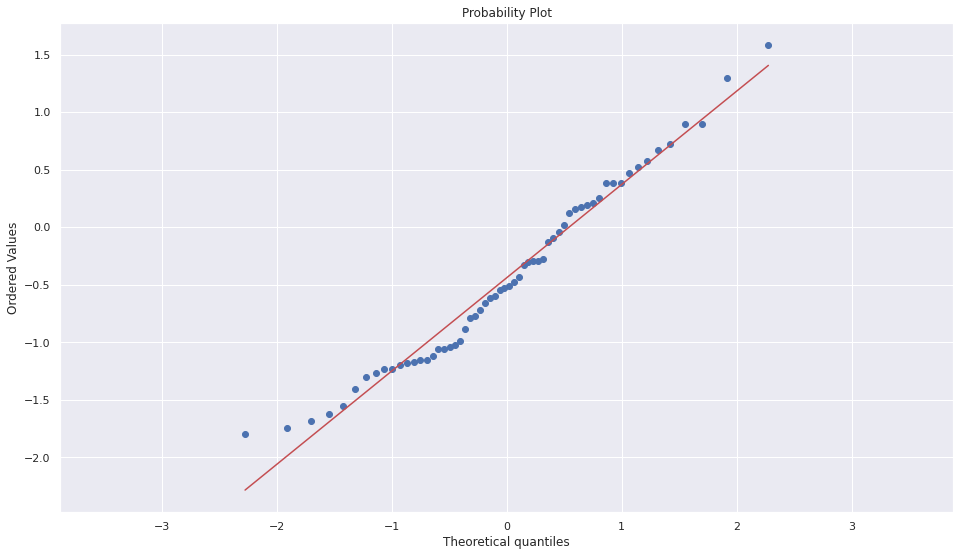

In [96]:
ks_stat, ks_pvalue = kstest(interDataScientists.dropna(), 'norm')
print("Alpha: 0.05")
print("p-value: " + str(round(ks_pvalue, 4)))

stats.probplot(interDataScientists.dropna(), fit = True, plot = plt)
plt.axis('equal')
plt.show()

Alpha: 0.05
p-value: 0.0001


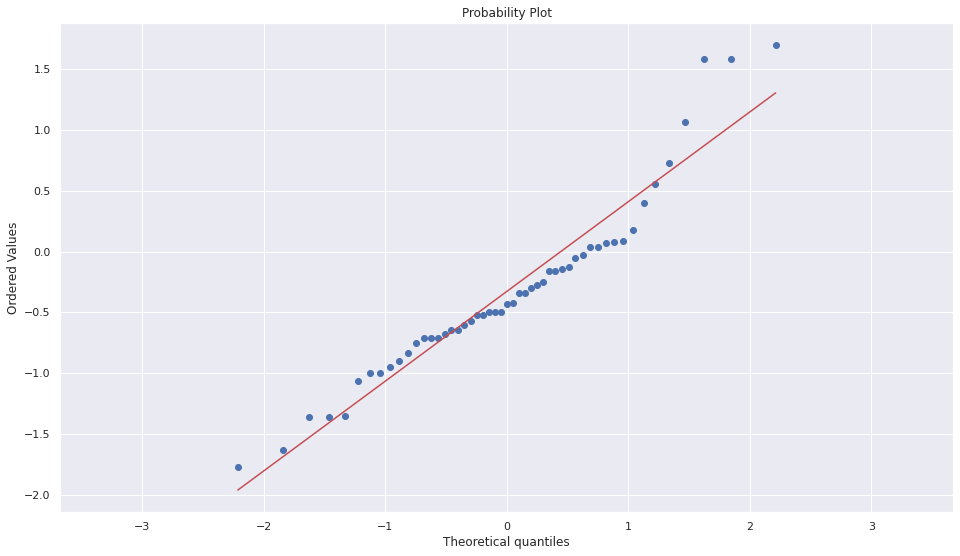

In [97]:
ks_stat, ks_pvalue = kstest(interDataEngineers.dropna(), 'norm')
print("Alpha: 0.05")
print("p-value: " + str(round(ks_pvalue, 4)))

stats.probplot(interDataEngineers.dropna(), fit = True, plot = plt)
plt.axis('equal')
plt.show()

### Prueba de hipótesis de varianza

In [98]:
#Prueba de varianzas entre las distribuciones
stats.levene(interDataScientists, interDataEngineers)

LeveneResult(statistic=1.94294042933246, pvalue=0.16618486174707067)

### Prueba de hipótesis

$H_o: ~\mu_1 = \mu_2$,

$H_1: ~\mu_1 > \mu_2$,

donde $\mu_1$ es el salario promedio de un Data Engineer, y $\mu_2$ es el salario promedio de un Data Scientist. Para un $\alpha = 0.05$.

In [99]:
#Prueba t
t_stat, pvalue = stats.ttest_ind(a = interDataEngineers, b = interDataScientists, alternative = "greater", equal_var=True)
print("Alpha: 0.05")
print("p-value: " + str(round(pvalue, 4)))

Alpha: 0.05
p-value: 0.2296


No se rechaza $H_o$, no hay evidencia suficiente para afirmar que el sueldo promedio de un Data Engineer es mayor al de un Data Scientist.

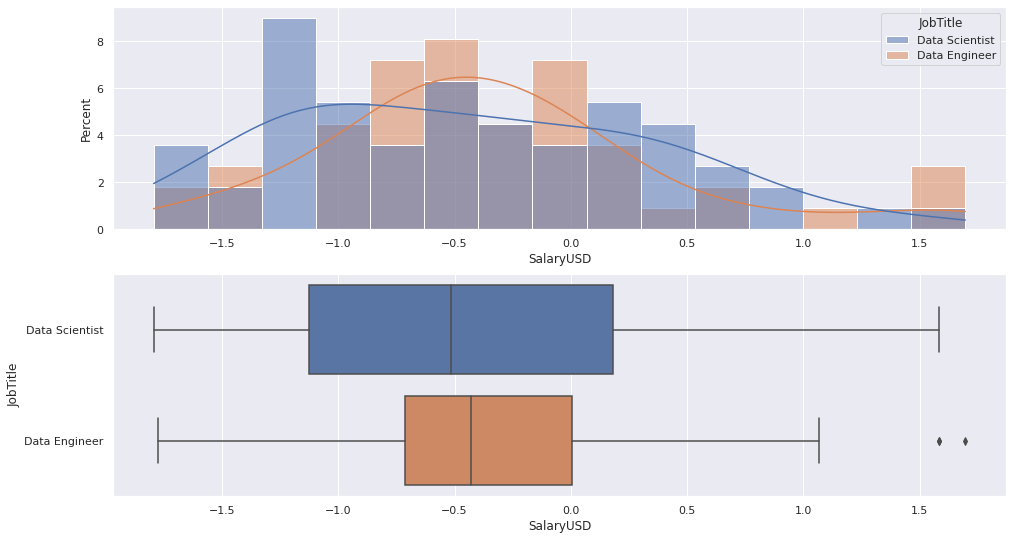

In [100]:
fig, ax = plt.subplots(2, 1)
sns.histplot(data = P1_Inter, x = "SalaryUSD", kde = True, stat = "percent", hue = "JobTitle", ax = ax[0], bins = 15)
sns.boxplot(data = P1_Inter, x = "SalaryUSD", y = "JobTitle", ax = ax[1])
plt.show()

# Pregunta 2

¿Hay diferencia significativa en el salario promedio en función de la experiencia en una empresa Estadounidense?

- **Caso 1**: el salario promedio de un intermedio es mayor que el salario promedio de un principiante.
- **Caso 2**: el salario promedio de un experto es mayor que el salario promedio de un intermedio.
- **Caso 3**: el salario promedio de un ejecutivo es mayor que el salario promedio de un experto

## Subconjunto de datos

In [101]:
P2 = df.groupby("ExperienceLevel").get_group("EN")
P2 = pd.concat([P2, df.groupby("ExperienceLevel").get_group("MI"), 
                    df.groupby("ExperienceLevel").get_group("SE"), 
                    df.groupby("ExperienceLevel").get_group("EX")])
P2 = P2.groupby("CompanyLocation").get_group("US")
P2 = P2.drop(columns = ["WorkYear", "CompanySize"])
P2.head(-1)

,ExperienceLevel,JobTitle,SalaryUSD,CompanyLocation
5,EN,Data Analyst,-0.610221,US
28,EN,Business Data Analyst,-0.130751,US
31,EN,Big Data Engineer,-0.644468,US
37,EN,Machine Learning Engineer,2.437833,US
39,EN,Machine Learning Engineer,0.519957,US
...,...,...,...,...
327,EX,Data Analyst,0.040487,US
342,EX,Head of Data Science,1.992611,US
343,EX,Head of Data Science,1.031533,US
344,EX,Analytics Engineer,1.153541,US


In [102]:
P2.ExperienceLevel.value_counts()

SE    215
MI     85
EN     31
EX     12
Name: ExperienceLevel, dtype: int64

## Principiante vs. Intermedio

In [103]:
EN_US = P2.groupby("ExperienceLevel").get_group("EN").SalaryUSD
EN_US.describe()[1:3]

mean   -0.248685
std     0.827504
Name: SalaryUSD, dtype: float64

In [104]:
MI_US = P2.groupby("ExperienceLevel").get_group("SE").SalaryUSD
MI_US.describe()[1:3]

mean    0.692472
std     0.779448
Name: SalaryUSD, dtype: float64

### Prueba de normalidad

Alpha: 0.05
p-value: 0.0072


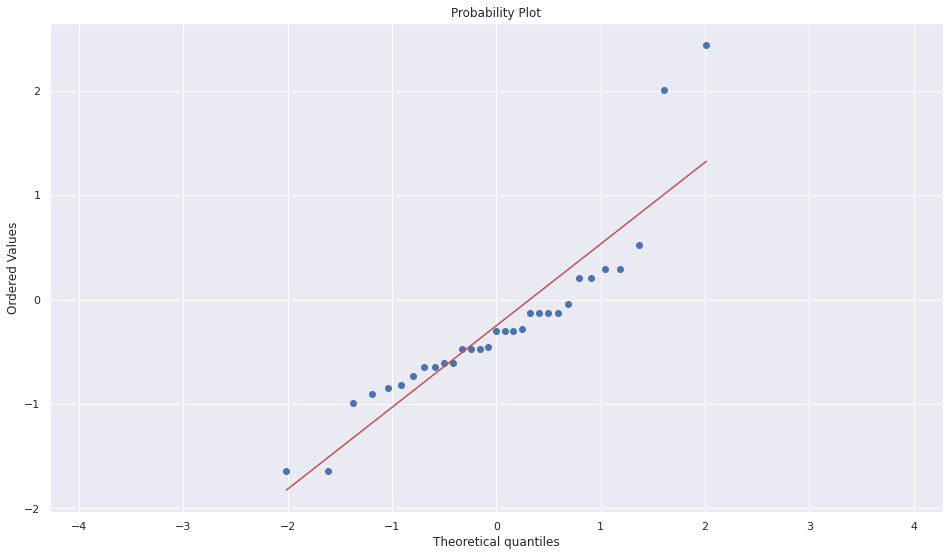

In [105]:
ks_stat, ks_pvalue = kstest(EN_US.dropna(), 'norm')
print("Alpha: 0.05")
print("p-value: " + str(round(ks_pvalue, 4)))

stats.probplot(EN_US.dropna(), fit = True, plot = plt)
plt.axis('equal')
plt.show()

Alpha: 0.05
p-value: 0.0


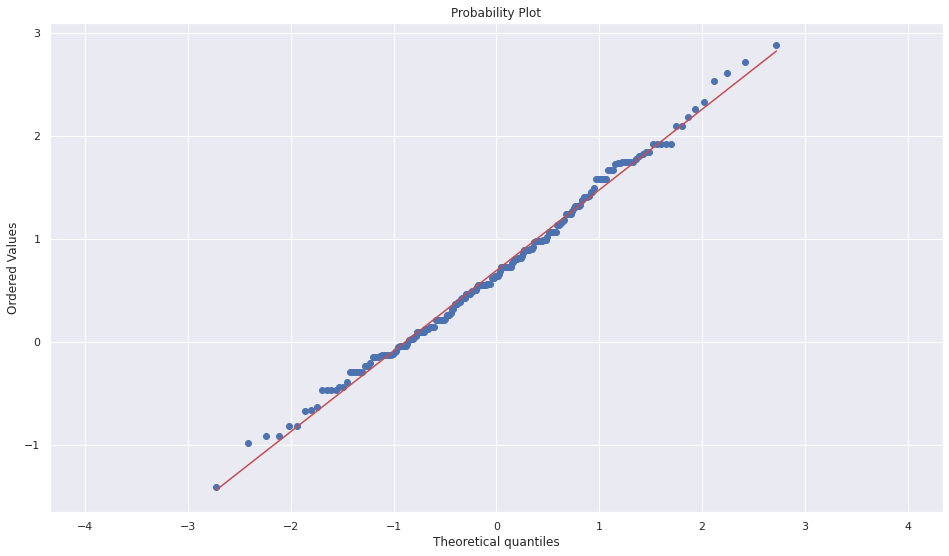

In [106]:
ks_stat, ks_pvalue = kstest(MI_US.dropna(), 'norm')
print("Alpha: 0.05")
print("p-value: " + str(round(ks_pvalue, 4)))
#print("Estadístico de pureba: " + str(round(ks_stat, 4)))

stats.probplot(MI_US.dropna(), fit = True, plot = plt)
plt.axis('equal')
plt.show()

In [107]:
len(MI_US)

215

### Prueba de hipótesis de varianza

In [108]:
#Prueba de varianzas entre las distribuciones
stats.levene(EN_US, MI_US)

LeveneResult(statistic=0.9587314647509266, pvalue=0.32847650569910813)

### Prueba de hipótesis

$H_o: ~\mu_1 = \mu_2$,

$H_1: ~\mu_1 > \mu_2$,

donde $\mu_1$ es el salario promedio de un empleado de nivel Intermedio, y $\mu_2$ es el salario promedio de un empleado de nivel Principiante. Con un $\alpha = 0.05$.

In [109]:
#Prueba t
t_test, pvalue = stats.ttest_ind(a = MI_US, b = EN_US, alternative = "greater", equal_var=True)
print("Alpha: 0.05")
print("p-value: " + str(round(pvalue, 4)))

Alpha: 0.05
p-value: 0.0


Se rechaza $H_o$, hay evidencia suficiente para afirmar que el salario promedio de un empleado Intermedio es mayor al de un empleado Principiante con un nivel de significancia del 95%.

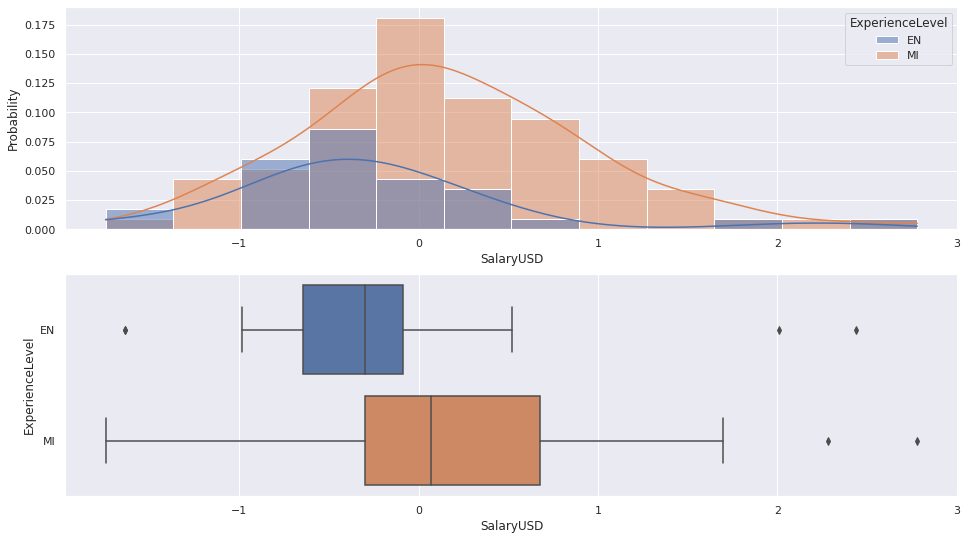

In [110]:
P2_ENvMI = pd.concat([P2.groupby("ExperienceLevel").get_group("EN"), 
                    P2.groupby("ExperienceLevel").get_group("MI")])
fig, ax = plt.subplots(2, 1)
sns.histplot(data = P2_ENvMI, x = "SalaryUSD", kde = True, stat = "probability", hue = "ExperienceLevel", ax = ax[0])
sns.boxplot(data = P2_ENvMI, x = "SalaryUSD", y = "ExperienceLevel", ax = ax[1])
plt.show()

## Intermedio vs. Experto

In [111]:
MI_US.describe()[1:3]

mean    0.692472
std     0.779448
Name: SalaryUSD, dtype: float64

In [112]:
SE_US = P2.groupby("ExperienceLevel").get_group("SE").SalaryUSD
SE_US.describe()[1:3]

mean    0.692472
std     0.779448
Name: SalaryUSD, dtype: float64

In [113]:
#Prueba de varianzas entre las distribuciones
stats.levene(MI_US, SE_US)

LeveneResult(statistic=0.0, pvalue=1.0)

### Prueba de hipótesis

$H_o: ~\mu_1 = \mu_2$,

$H_1: ~\mu_1 > \mu_2$,

donde $\mu_1$ es el salario promedio de un empleado de nivel Experto, y $\mu_2$ es el salario promedio de un empleado de nivel Intermedio. Con un $\alpha = 0.05$.

In [114]:
#Prueba t
t_stat, pvalue = stats.ttest_ind(a = SE_US, b = MI_US, alternative = "greater", equal_var=True)
print("Alpha: 0.05")
print("p-value: " + str(round(pvalue, 4)))

Alpha: 0.05
p-value: 0.5


No se rechaza $H_o$. No hay evidencia suficiente para afirmar que el salario promedio de un empleado de nivel Experto es mayor al de un empleado nivel Intermedio.

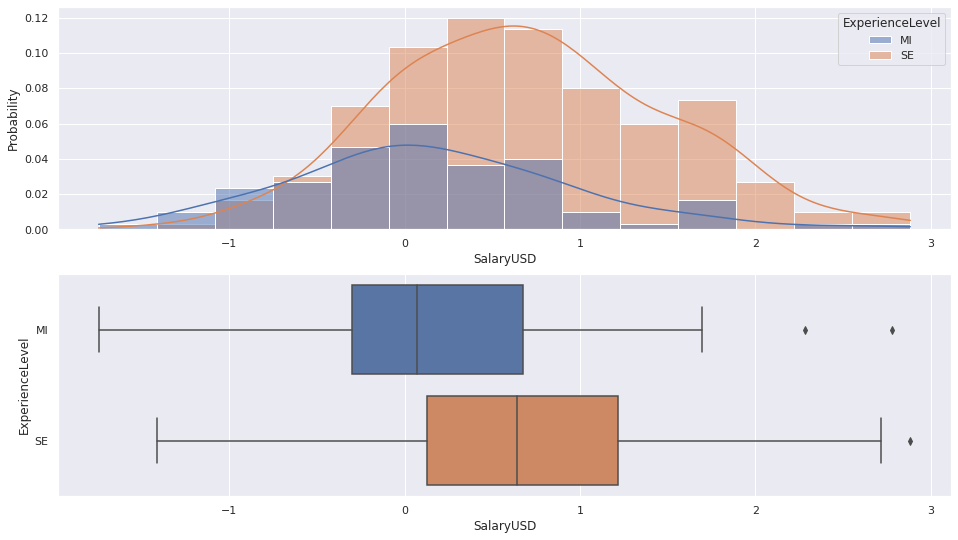

In [115]:
P2_MIvSE = pd.concat([P2.groupby("ExperienceLevel").get_group("MI"), 
                    P2.groupby("ExperienceLevel").get_group("SE")])
fig, ax = plt.subplots(2, 1)
sns.histplot(data = P2_MIvSE, x = "SalaryUSD", kde = True, stat = "probability", hue = "ExperienceLevel", ax = ax[0])
sns.boxplot(data = P2_MIvSE, x = "SalaryUSD", y = "ExperienceLevel", ax = ax[1])
plt.show()

## Experto vs. Ejecutivo

In [116]:
SE_US.describe()[1:3]

mean    0.692472
std     0.779448
Name: SalaryUSD, dtype: float64

In [117]:
EX_US = P2.groupby("ExperienceLevel").get_group("EX").SalaryUSD
EX_US.describe()[1:3]

mean    1.346006
std     0.823354
Name: SalaryUSD, dtype: float64

In [118]:
#Prueba de varianzas entre las distribuciones
stats.levene(EX_US, SE_US)

LeveneResult(statistic=0.41582239381956165, pvalue=0.5196859143382342)

### Prueba de hipótesis

$H_o: ~\mu_1 = \mu_2$,

$H_1: ~\mu_1 > \mu_2$,

donde $\mu_1$ es el salario promedio de un empleado de nivel Ejecutivo, y $\mu_2$ es el salario promedio de un empleado de nivel Experto. Con un $\alpha = 0.05$.

In [119]:
#Prueba t
t_test, pvalue = stats.ttest_ind(a = EX_US, b = SE_US, alternative = "greater", equal_var=True)
print("Alpha: 0.05")
print("p-value: " + str(round(pvalue, 4)))

Alpha: 0.05
p-value: 0.0026


Se rechaza $H_o$. Hay suficiente evidencia estadística para decir, con un nivel de significancia del 95%, que el salario de un empleado nivel Ejecutivo es mayor al de un empleado nivel Experto.

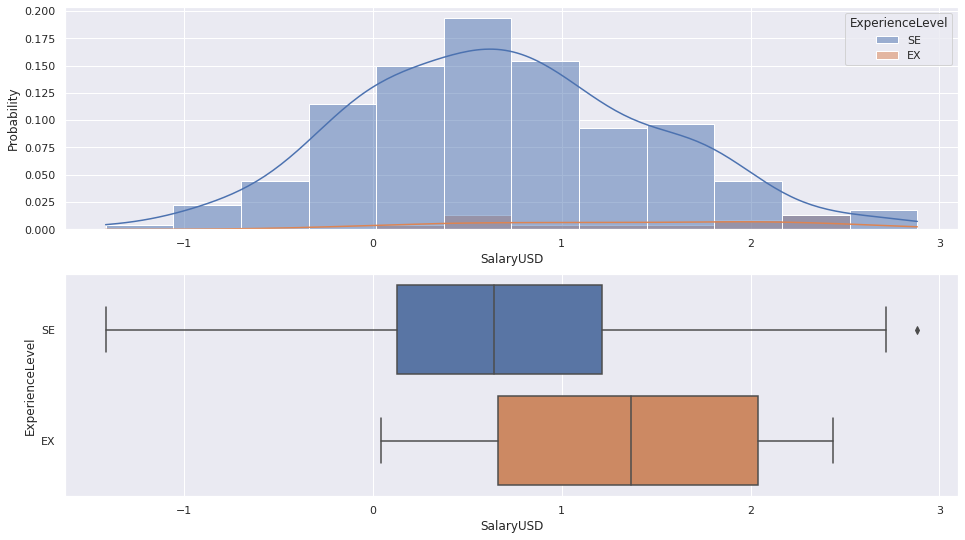

In [120]:
P2_SEvsEX = pd.concat([P2.groupby("ExperienceLevel").get_group("SE"), 
                    P2.groupby("ExperienceLevel").get_group("EX")])
fig, ax = plt.subplots(2, 1)
sns.histplot(data = P2_SEvsEX, x = "SalaryUSD", kde = True, stat = "probability", hue = "ExperienceLevel", ax = ax[0])
sns.boxplot(data = P2_SEvsEX, x = "SalaryUSD", y = "ExperienceLevel", ax = ax[1])
plt.show()

# Pregunta 3

¿El salario promedio ofrecido en una empresa mediana en Estados Unidos es mayor al que ofrece una empresa mediana en Reino Unido?

## Subconjunto de datos

In [121]:
P3 = df.groupby("CompanyLocation").get_group("US")
P3 = pd.concat([P3, df.groupby("CompanyLocation").get_group("GB")])
P3 = P3.drop(columns = ["WorkYear", "ExperienceLevel", "JobTitle"])
P3.head(-1)

,SalaryUSD,CompanyLocation,CompanySize
4,0.725443,US,L
5,-0.610221,US,L
6,1.410399,US,S
8,0.468585,US,L
13,-0.353362,US,L
...,...,...,...
442,-0.162294,GB,M
443,-0.498470,GB,M
474,1.294436,GB,M
475,-0.274352,GB,M


In [122]:
P3.CompanyLocation.value_counts()

US    343
GB     47
Name: CompanyLocation, dtype: int64

In [123]:
P3.groupby("CompanyLocation").get_group("US").CompanySize.value_counts()

M    216
L     97
S     30
Name: CompanySize, dtype: int64

In [124]:
P3.groupby("CompanyLocation").get_group("GB").CompanySize.value_counts()

M    31
L    11
S     5
Name: CompanySize, dtype: int64

In [125]:
P3 = P3.groupby("CompanySize").get_group("M")
P3.head(-1)

,SalaryUSD,CompanyLocation,CompanySize
19,-0.884203,US,M
23,-0.164999,US,M
57,0.177479,US,M
59,0.525950,US,M
61,0.396664,US,M
...,...,...,...
442,-0.162294,GB,M
443,-0.498470,GB,M
474,1.294436,GB,M
475,-0.274352,GB,M


In [126]:
US_M = P3.groupby("CompanyLocation").get_group("US")["SalaryUSD"]
US_M.describe()[1:3]

mean    0.540046
std     0.788444
Name: SalaryUSD, dtype: float64

In [127]:
GB_M = P3.groupby("CompanyLocation").get_group("GB")["SalaryUSD"]
GB_M.describe()[1:3]

mean   -0.45277
std     0.55090
Name: SalaryUSD, dtype: float64

## Prueba de normalidad

Alpha: 0.05
p-value: 0.0


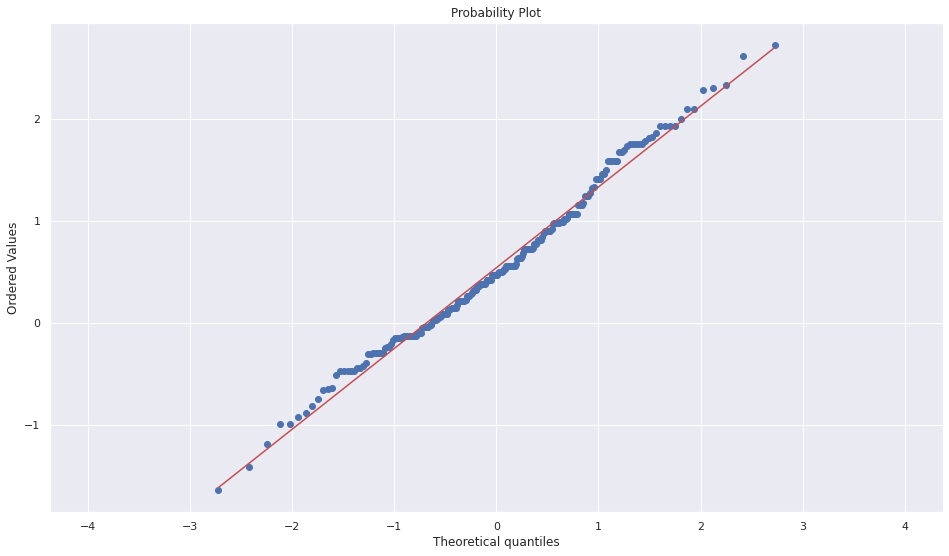

In [128]:
ks_stat, ks_pvalue = kstest(US_M.dropna(), 'norm')
print("Alpha: 0.05")
print("p-value: " + str(round(ks_pvalue, 4)))

stats.probplot(US_M.dropna(), fit = True, plot = plt)
plt.axis('equal')
plt.show()

Alpha: 0.05
p-value: 0.0003


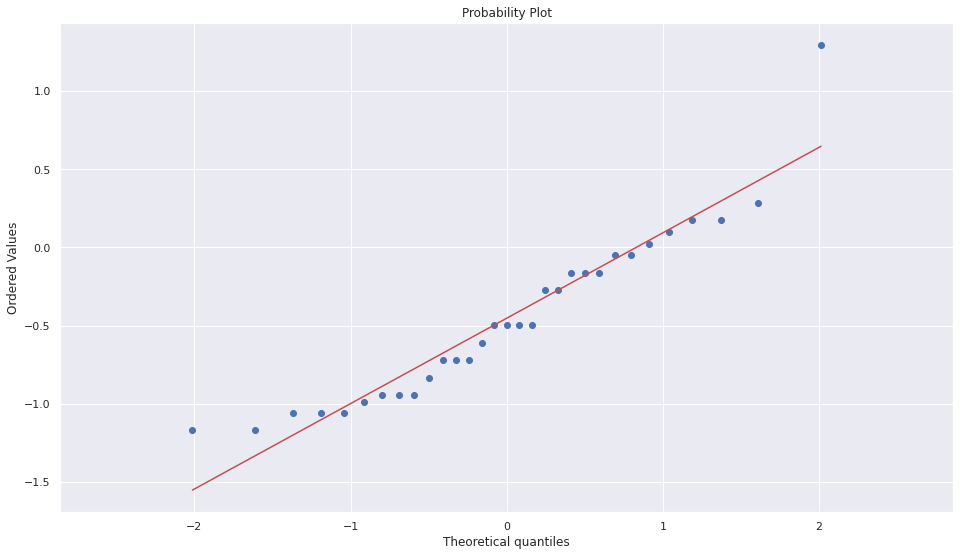

In [129]:
ks_stat, ks_pvalue = kstest(GB_M.dropna(), 'norm')
print("Alpha: 0.05")
print("p-value: " + str(round(ks_pvalue, 4)))

stats.probplot(GB_M.dropna(), fit = True, plot = plt)
plt.axis('equal')
plt.show()

## Prueba de hipótesis de varianza

In [130]:
#Prueba de varianzas entre las distribuciones
l_stat, l_pvalue = stats.levene(US_M, GB_M)
print("Alpha: 0.05")
print("p-value: " + str(round(l_pvalue, 4)))

Alpha: 0.05
p-value: 0.0342


Se rechaza $H_o$, por lo tanto, se supondrá que las varianzas poblacionales son diferentes.

## Prueba de hipótesis

$H_o: ~\mu_1 = \mu_2$,

$H_1: ~\mu_1 > \mu_2$,

donde $\mu_1$ es el salario promedio que ofrece una empresa mediana Estadounidense, y $\mu_2$ es el salario promedio que ofrece una empresa mediana Británica. Con un $\alpha = 0.05$.

In [131]:
#Prueba t
t_test, pvalue = stats.ttest_ind(a = US_M, b = GB_M, alternative = "greater", equal_var=False)
print("Alpha: 0.05")
print("p-value: " + str(round(pvalue, 4)))

Alpha: 0.05
p-value: 0.0


Se rechaza $H_o$. Con un nivel de significancia del 95% puede decirse que el salario que ofrece una empresa mediana de Estados Unidos, en promedio, es mayor al que ofrece una empresa de Reino Unido.

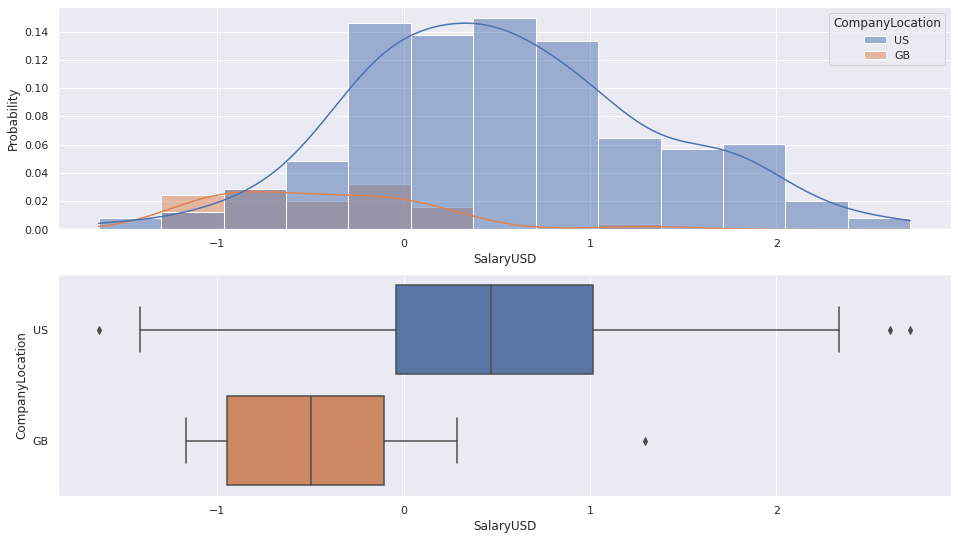

In [132]:
fig, ax = plt.subplots(2, 1)
sns.histplot(data = P3, x = "SalaryUSD", kde = True, stat = "probability", hue = "CompanyLocation", ax = ax[0])
sns.boxplot(data = P3, x = "SalaryUSD", y = "CompanyLocation", ax = ax[1])
plt.show()